<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_2051-2100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [171]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

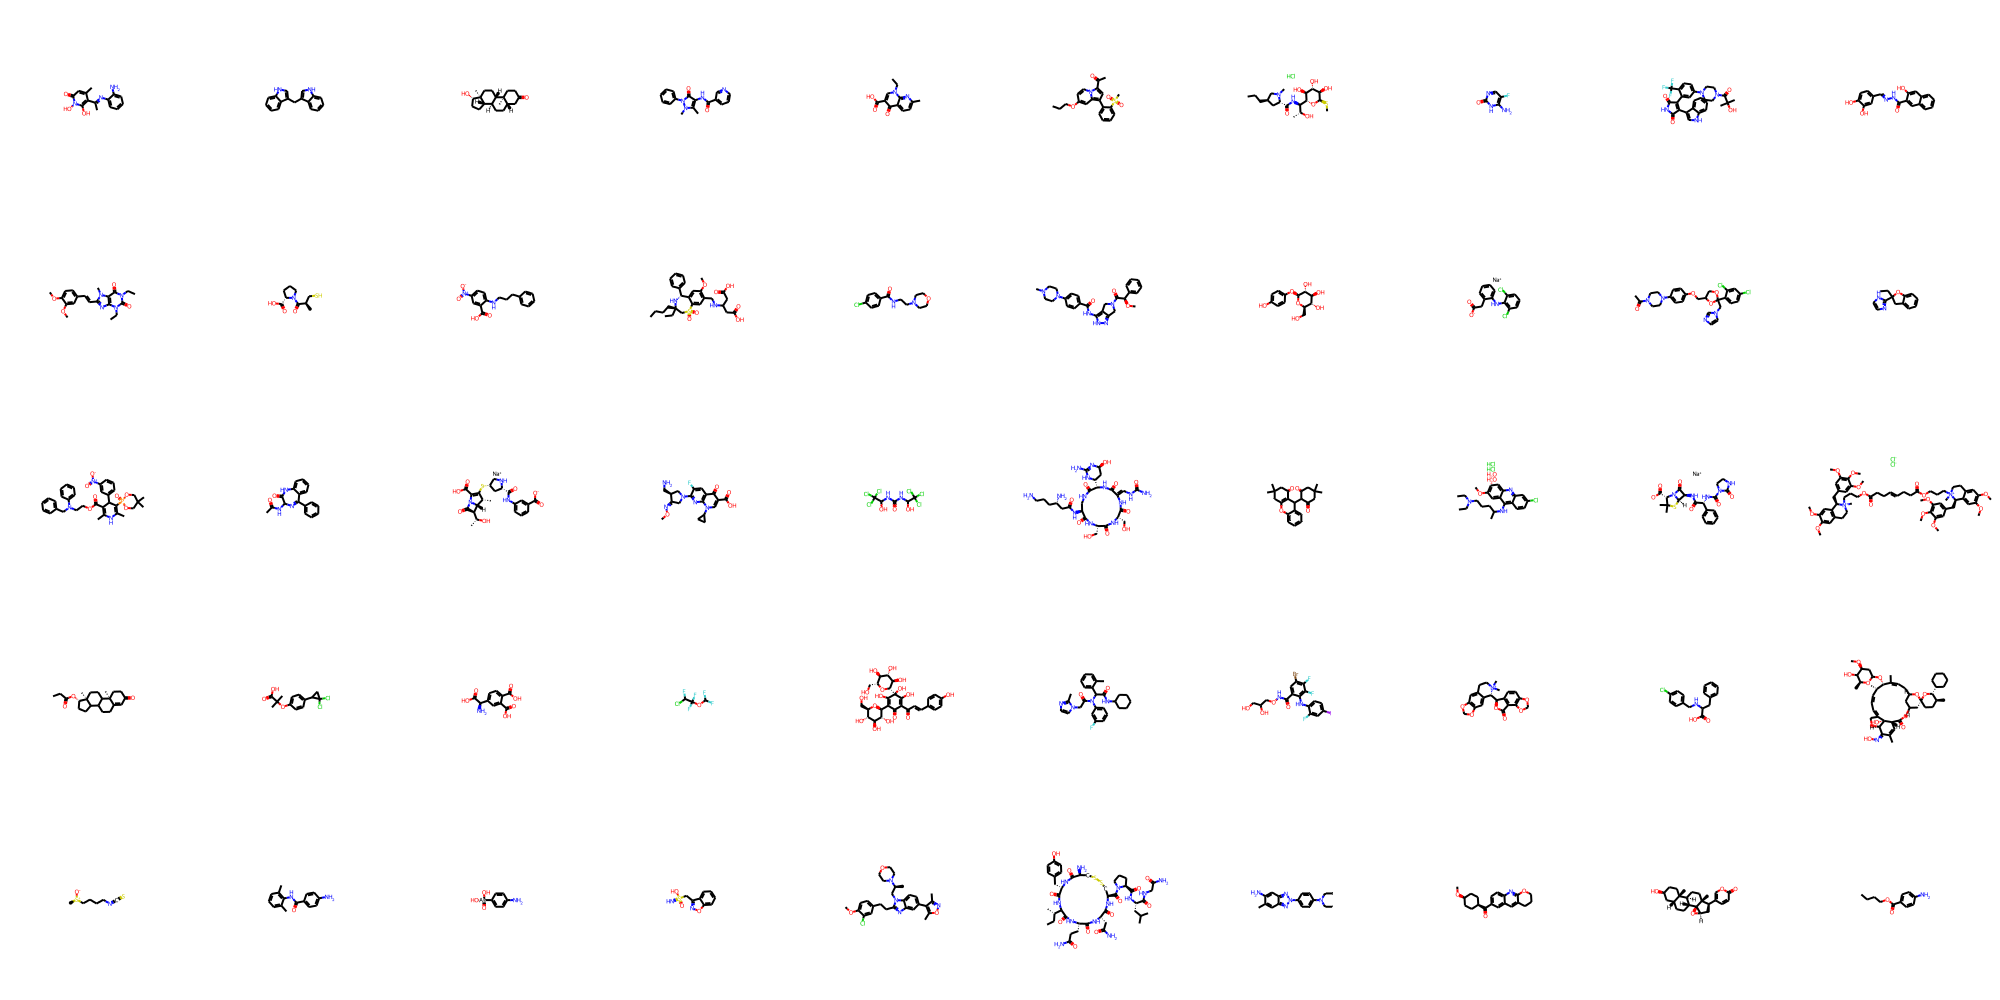

In [172]:
smiles_list = [

'C/C(=N\c1ccccc1N)c1c(C)cc(=O)n(O)c1O',
'c1ccc2c(Cc3c[nH]c4ccccc34)c[nH]c2c1',
'C[C@]12CC[C@H]3[C@@H](CC[C@H]4CC(=O)CC[C@@]43C)[C@@H]1CC[C@@H]2O',
'Cc1c(NC(=O)c2cccnc2)c(=O)n(-c2ccccc2)n1C',
'CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21',
'CCCOc1ccn2c(C(C)=O)cc(-c3ccccc3S(C)(=O)=O)c2c1',
'CCC[C@@H]1C[C@@H](C(=O)N[C@H]([C@@H](C)O)[C@H]2O[C@H](SC)[C@H](O)[C@@H](O)[C@@H]2O)N(C)C1.Cl',
'Nc1[nH]c(=O)ncc1F',
'CC(C)(O)C(=O)N1CCN(c2ccc(C(F)(F)F)c(C3=C(c4c[nH]c5ccccc45)C(=O)NC3=O)c2)CC1',
'O=C(N/N=C/c1ccc(O)c(O)c1)c1cc2ccccc2cc1O',
'CCn1c(=O)c2c(nc(/C=C/c3ccc(OC)c(OC)c3)n2C)n(CC)c1=O',
'C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O',
'O=C(O)c1cc([N+](=O)[O-])ccc1NCCCc1ccccc1',
'CCCC[C@]1(CC)CS(=O)(=O)c2cc(CNC(CC(=O)O)CC(=O)O)c(OC)cc2[C@@H](c2ccccc2)N1',
'O=C(NCCN1CCOCC1)c1ccc(Cl)cc1',
'CO[C@@H](C(=O)N1Cc2n[nH]c(NC(=O)c3ccc(N4CCN(C)CC4)cc3)c2C1)c1ccccc1',
'OC[C@H]1O[C@@H](Oc2ccc(O)cc2)[C@H](O)[C@@H](O)[C@@H]1O',
'O=C([O-])Cc1ccccc1Nc1c(Cl)cccc1Cl.[Na+]',
'CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)cc4Cl)O3)cc2)CC1',
'CCC1(c2ncc[nH]2)Cc2ccccc2O1',
'CC1=C(C(=O)OCCN(Cc2ccccc2)c2ccccc2)C(c2cccc([N+](=O)[O-])c2)C(P2(=O)OCC(C)(C)CO2)=C(C)N1',
'CC(=O)NC1N=C(c2ccccc2)c2ccccc2NC1=O',
'C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[C@H](C(=O)Nc4cccc(C(=O)[O-])c4)C3)[C@H](C)[C@H]12.[Na+]',
'CO/N=C1\CN(c2nc3c(cc2F)c(=O)c(C(=O)O)cn3C2CC2)C[C@@H]1CN',
'O=C(NC(O)C(Cl)(Cl)Cl)NC(O)C(Cl)(Cl)Cl',
'NCCC[C@H](N)CC(=O)N[C@H]1CNC(=O)[C@H](C2C[C@H](O)N=C(N)N2)NC(=O)/C(=C/NC(N)=O)NC(=O)[C@H](CO)NC(=O)[C@H](CO)NC1=O',
'CC1(C)CC(=O)C(C2C3=C(CC(C)(C)CC3=O)Oc3ccccc32)C(=O)C1',
'CCN(CC)CCCC(C)Nc1c2ccc(Cl)cc2nc2ccc(OC)cc12.Cl.Cl.O.O',
'CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](NC(=O)N3CCNC3=O)c3ccccc3)C(=O)N2[C@H]1C(=O)[O-].[Na+]',
'COc1cc2c(cc1OC)[C@@H](Cc1cc(OC)c(OC)c(OC)c1)[N+](C)(CCCOC(=O)CC/C=C/CCC(=O)OCCC[N+]1(C)CCc3cc(OC)c(OC)cc3[C@H]1Cc1cc(OC)c(OC)c(OC)c1)CC2.[Cl-].[Cl-]',
'CCC(=O)O[C@H]1CCC2C3CCC4=CC(=O)CC[C@]4(C)C3CC[C@@]21C',
'CC(C)(Oc1ccc(C2CC2(Cl)Cl)cc1)C(=O)O',
'N[C@@H](C(=O)O)c1ccc(C(=O)O)c(C(=O)O)c1',
'FC(F)OC(F)(F)C(F)Cl',
'O=C(/C=C/c1ccc(O)cc1)C1=C(O)C(O)([C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)C(O)=C([C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)C1=O',
'Cc1ccccc1C(C(=O)NC1CCCCC1)N(C(=O)Cn1ccnc1C)c1cccc(F)c1',
'O=C(NOCC(O)CO)c1cc(Br)c(F)c(F)c1Nc1ccc(I)cc1F',
'C[N+]1(C)CCc2cc3c(cc2[C@H]1[C@@H]1OC(=O)c2c1ccc1c2OCO1)OCO3',
'O=C(O)C(Cc1ccccc1)NCc1ccc(Cl)cc1',
'CO[C@H]1CC(O[C@@H]2/C(C)=C/C[C@@H]3C[C@@H](C[C@]4(CC[C@H](C)[C@@H](C5CCCCC5)O4)O3)OC(=O)[C@@H]3C=C(C)/C(=N/O)[C@H]4OC/C(=C\C=C\[C@@H]2C)[C@@]34O)O[C@@H](C)C1O',
'C[S@@+]([O-])CCCCN=C=S',
'Cc1cccc(C)c1NC(=O)c1ccc(N)cc1',
'Nc1ccc([As](=O)(O)O)cc1',
'N=S(=O)(O)Cc1noc2ccccc12',
'COc1ccc(CCc2nc3cc(-c4c(C)noc4C)ccc3n2C[C@H](C)N2CCOCC2)cc1Cl',
'CC[C@H](C)C1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)[C@@H](N)CSSC[C@@H](C(=O)N2CCC[C@H]2C(=O)N[C@@H](CC(C)C)C(=O)NCC(N)=O)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CCC(N)=O)NC1=O',
'CCN(CC)c1ccc(-n2nc3cc(C)c(N)cc3n2)cc1',
'CO[C@H]1CC[C@@H](C(=O)c2ccc3nc4c(cc3c2)CCCO4)CC1',
'C[C@]12CC[C@H](O)C[C@H]1CC[C@@H]1[C@@H]2CC[C@]2(C)[C@@H](c3ccc(=O)oc3)C[C@H]3O[C@@]312',
'CCCCOC(=O)c1ccc(N)cc1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



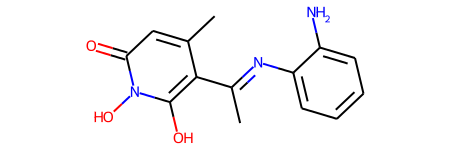

In [173]:
M1 = mol_list [0]
M1

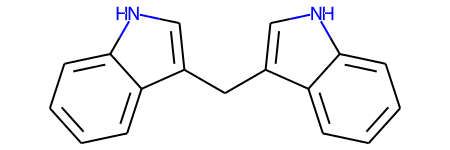

In [174]:
M2 = mol_list [1]
M2

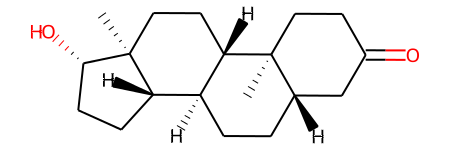

In [175]:
M3 = mol_list [2]
M3

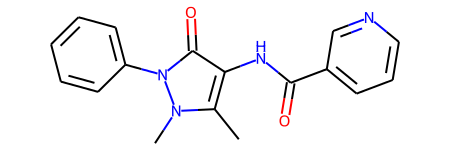

In [176]:
M4 = mol_list [3]
M4

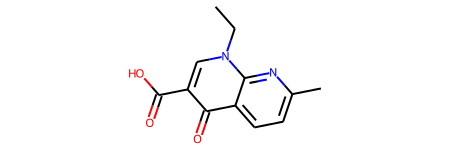

In [177]:
M5 = mol_list [4]
M5

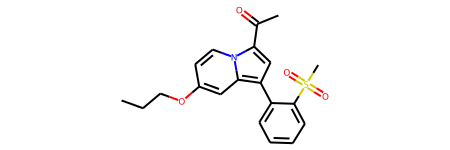

In [178]:
M6 = mol_list [5]
M6

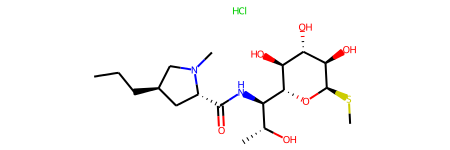

In [179]:
M7 = mol_list [6]
M7

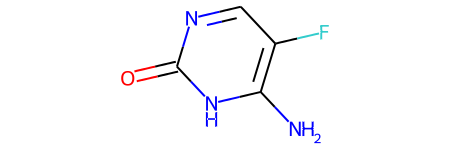

In [180]:
M8 = mol_list [7]
M8

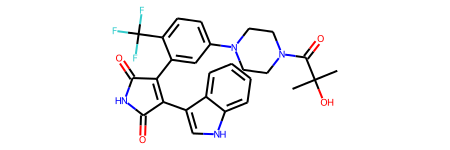

In [181]:
M9 = mol_list [8]
M9

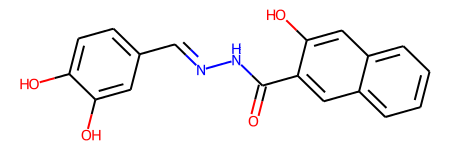

In [182]:
M10 = mol_list [9]
M10

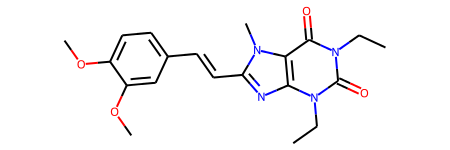

In [183]:
M11 = mol_list [10]
M11

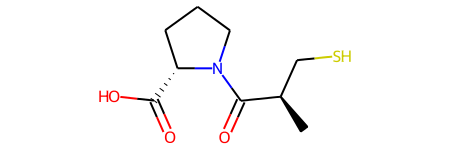

In [184]:
M12 = mol_list [11]
M12

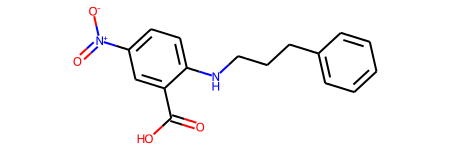

In [185]:
M13 = mol_list [12]
M13

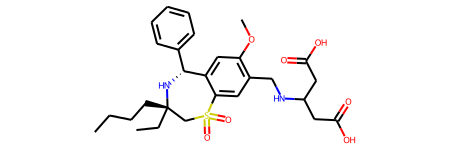

In [186]:
M14 = mol_list [13]
M14

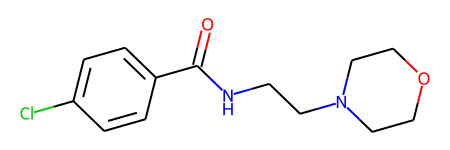

In [187]:
M15 = mol_list [14]
M15

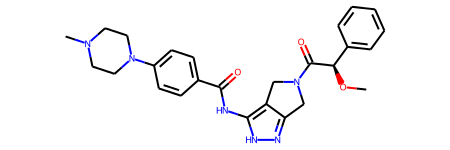

In [188]:
M16 = mol_list [15]
M16

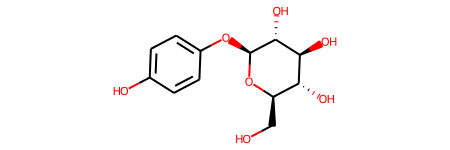

In [189]:
M17 = mol_list [16]
M17

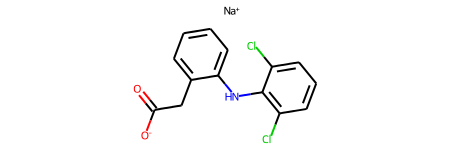

In [190]:
M18 = mol_list [17]
M18

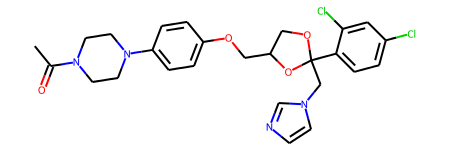

In [191]:
M19 = mol_list [18]
M19

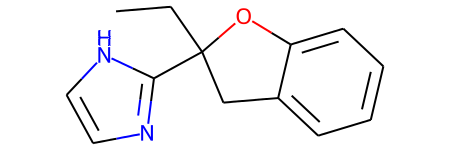

In [192]:
M20 = mol_list [19]
M20

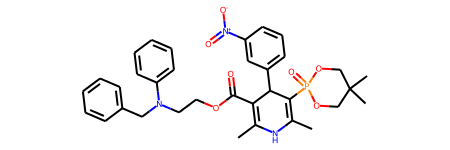

In [193]:
M21 = mol_list [20]
M21

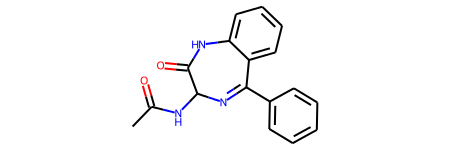

In [194]:
M22 = mol_list [21]
M22

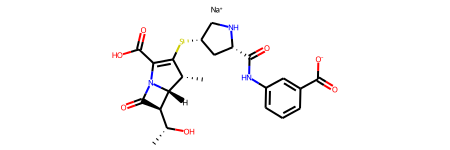

In [195]:
M23 = mol_list [22]
M23

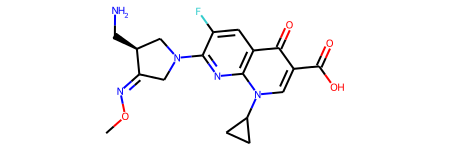

In [196]:
M24 = mol_list [23]
M24

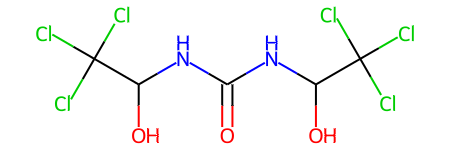

In [197]:
M25 = mol_list [24]
M25

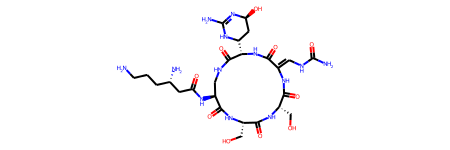

In [198]:
M26 = mol_list [25]
M26

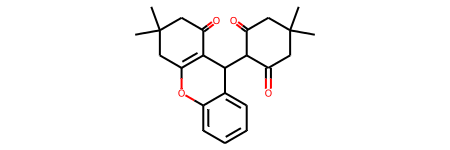

In [199]:
M27 = mol_list [26]
M27

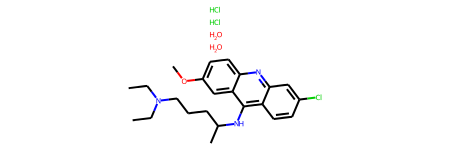

In [200]:
M28 = mol_list [27]
M28

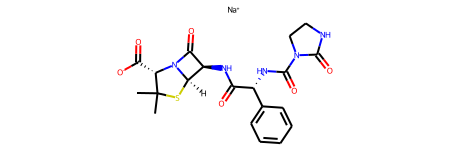

In [201]:
M29 = mol_list [28]
M29

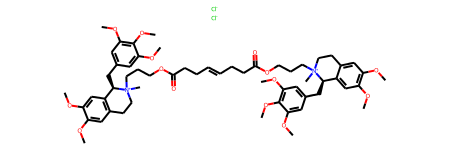

In [202]:
M30 = mol_list [29]
M30

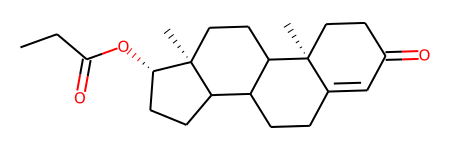

In [203]:
M31 = mol_list [30]
M31

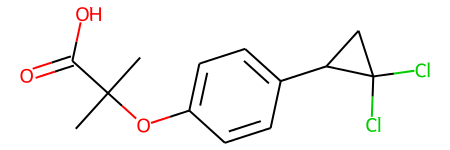

In [204]:
M32 = mol_list [31]
M32

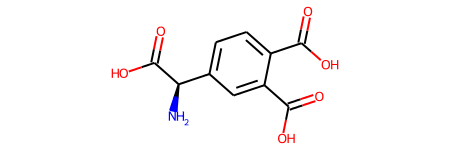

In [205]:
M33 = mol_list [32]
M33

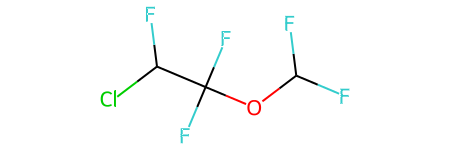

In [206]:
M34 = mol_list [33]
M34

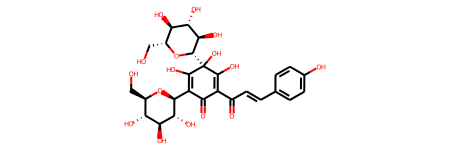

In [207]:
M35 = mol_list [34]
M35

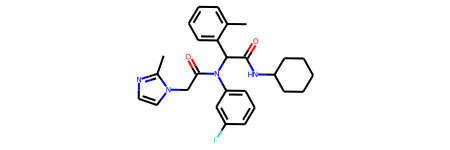

In [208]:
M36 = mol_list [35]
M36

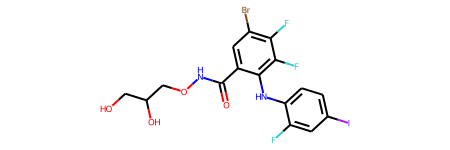

In [209]:
M37= mol_list [36]
M37

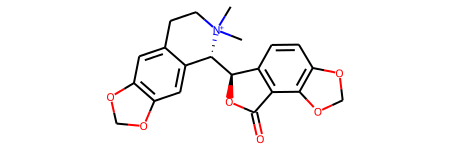

In [210]:
M38= mol_list [37]
M38

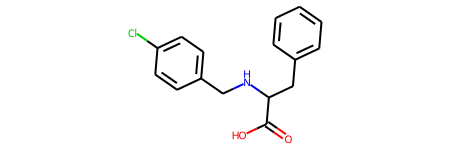

In [211]:
M39= mol_list [38]
M39

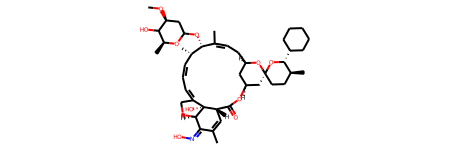

In [212]:
M40= mol_list [39]
M40

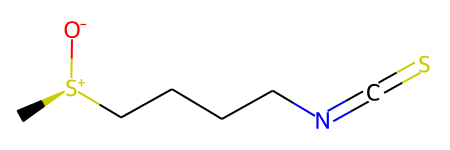

In [213]:
M41= mol_list [40]
M41

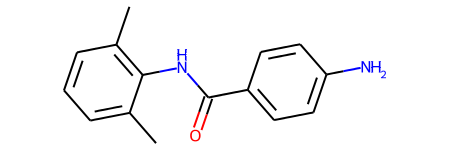

In [214]:
M42= mol_list [41]
M42

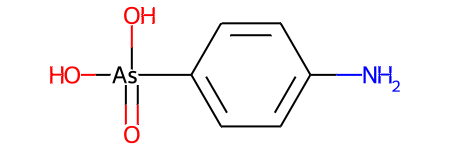

In [215]:
M43= mol_list [42]
M43

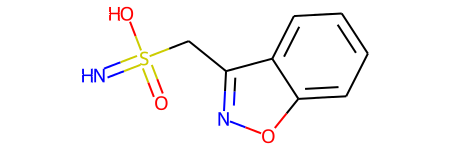

In [216]:
M44= mol_list [43]
M44

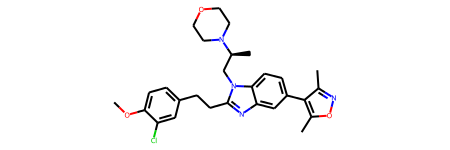

In [217]:
M45= mol_list [44]
M45

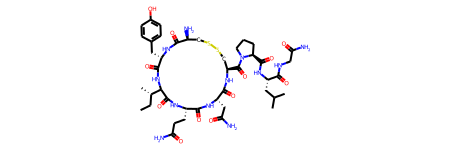

In [218]:
M46= mol_list [45]
M46

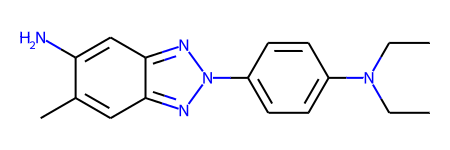

In [219]:
M47= mol_list [46]
M47

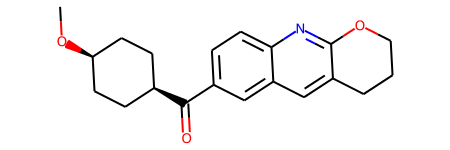

In [220]:
M48= mol_list [47]
M48

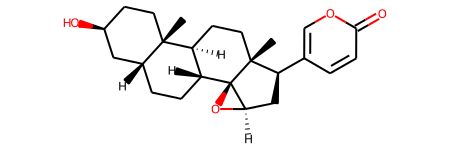

In [221]:
M49= mol_list [48]
M49

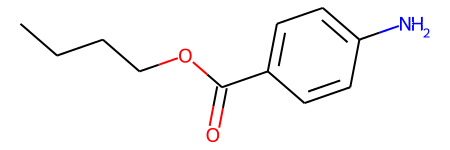

In [222]:
M50= mol_list [49]
M50

In [223]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[5,
 18,
 33,
 46,
 64,
 117,
 147,
 175,
 221,
 267,
 312,
 314,
 328,
 354,
 356,
 367,
 375,
 433,
 494,
 578,
 586,
 589,
 650,
 698,
 725,
 726,
 731,
 734,
 804,
 805,
 807,
 849,
 867,
 875,
 898,
 910,
 935,
 1006,
 1017]

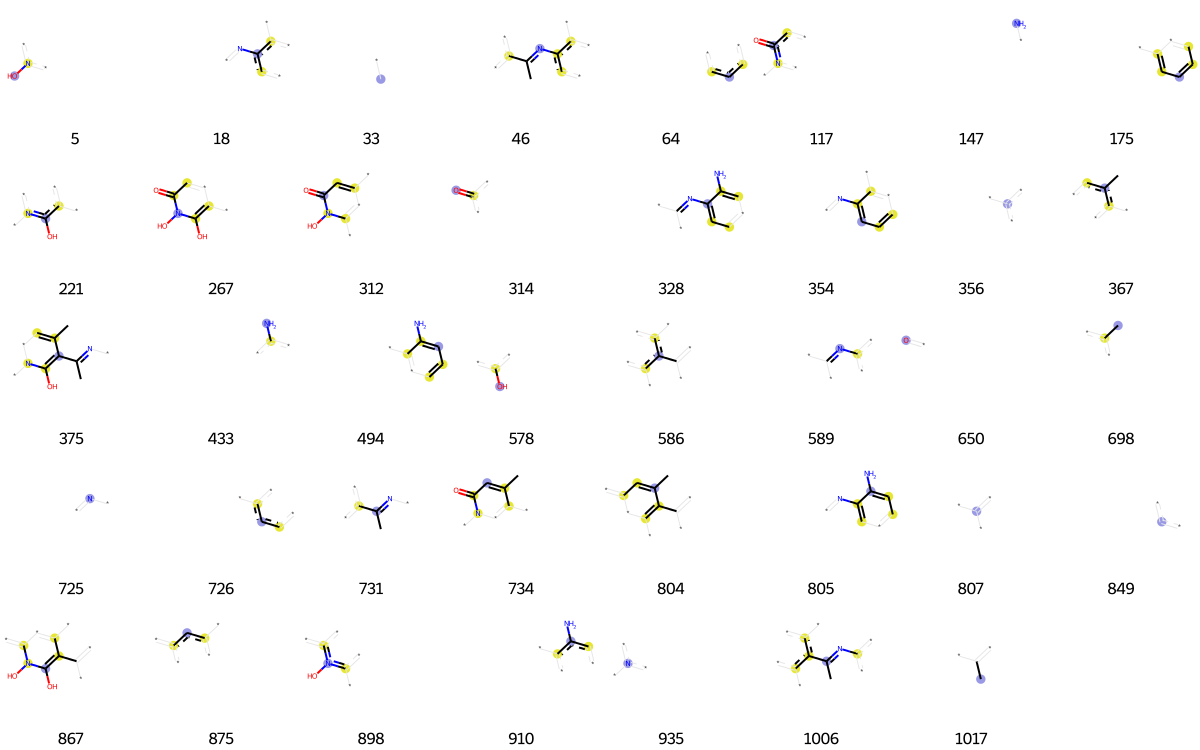

In [224]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [225]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[64,
 80,
 90,
 119,
 175,
 325,
 328,
 333,
 356,
 364,
 372,
 406,
 434,
 549,
 583,
 726,
 759,
 806,
 849,
 855,
 913]

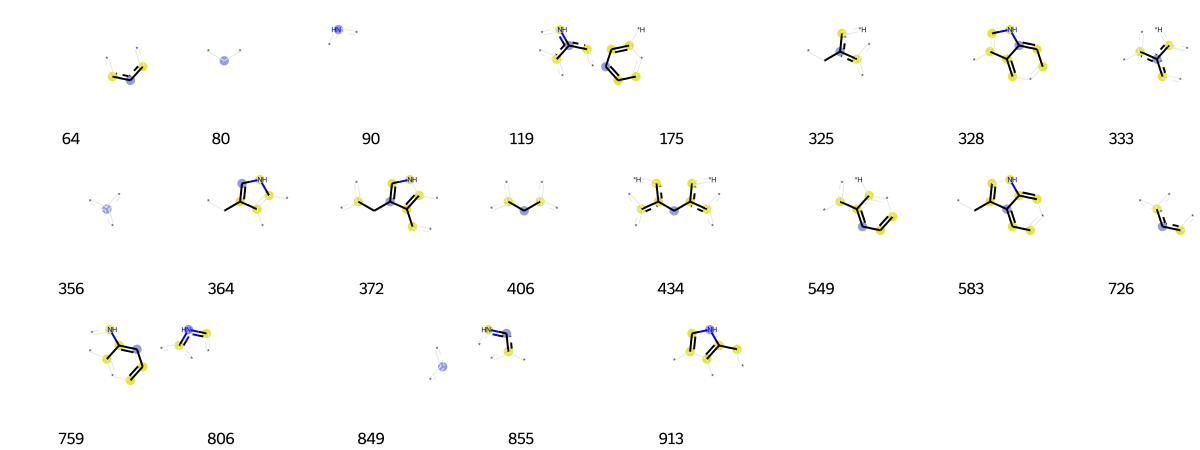

In [226]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [227]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 34,
 36,
 67,
 68,
 71,
 105,
 138,
 144,
 225,
 231,
 233,
 250,
 301,
 314,
 356,
 453,
 476,
 519,
 522,
 528,
 529,
 562,
 622,
 627,
 650,
 714,
 728,
 760,
 807,
 887,
 917,
 926,
 927,
 956,
 1019]

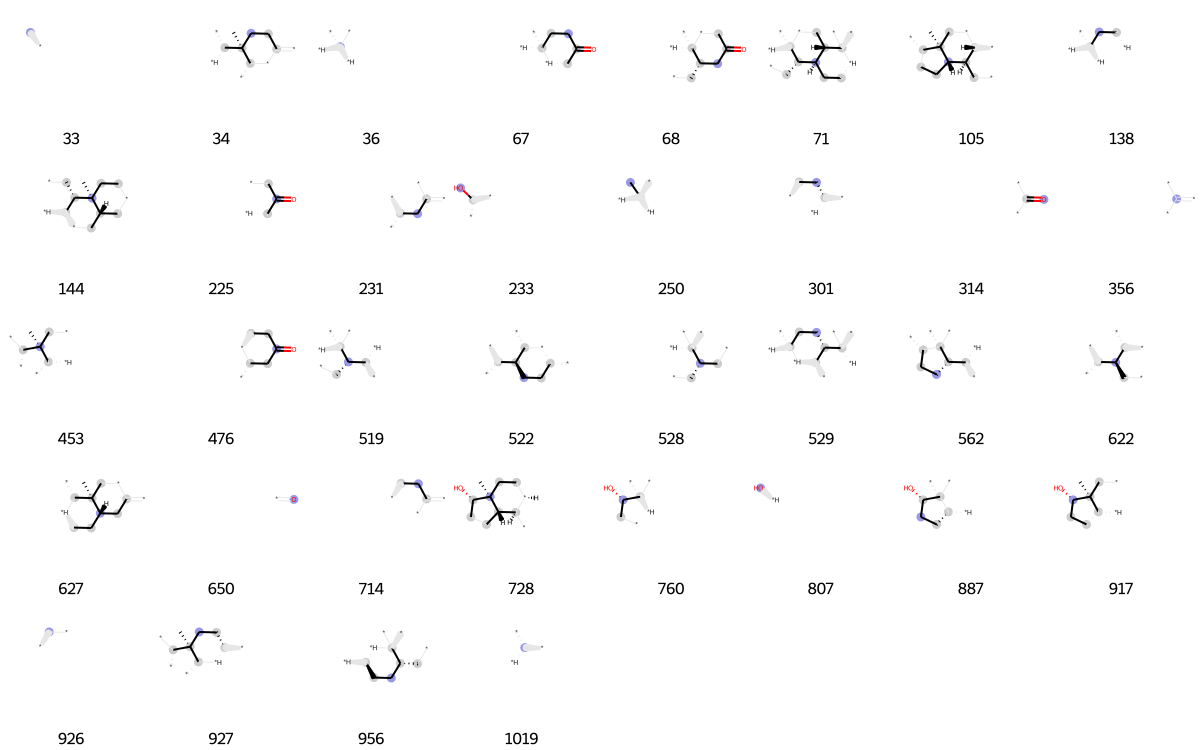

In [228]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [229]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[19,
 25,
 33,
 64,
 75,
 121,
 128,
 175,
 211,
 314,
 327,
 356,
 361,
 366,
 378,
 381,
 389,
 426,
 430,
 437,
 486,
 504,
 511,
 562,
 570,
 579,
 580,
 650,
 698,
 712,
 726,
 742,
 771,
 792,
 801,
 807,
 842,
 849,
 893,
 935,
 938,
 961,
 979]

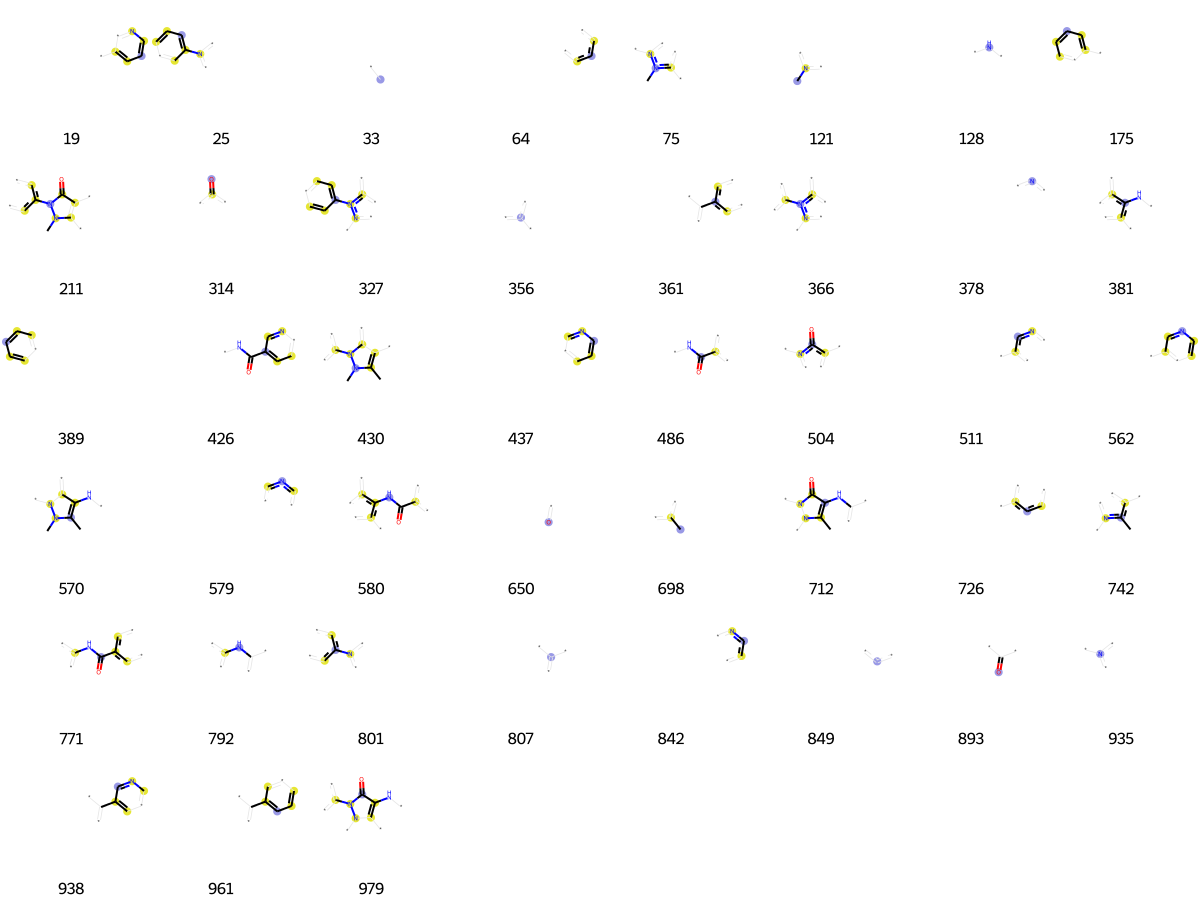

In [230]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [231]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[23,
 33,
 34,
 61,
 80,
 294,
 314,
 333,
 335,
 356,
 378,
 389,
 394,
 429,
 431,
 453,
 456,
 464,
 525,
 622,
 650,
 672,
 683,
 698,
 705,
 707,
 709,
 726,
 771,
 807,
 831,
 849,
 893,
 935,
 967]

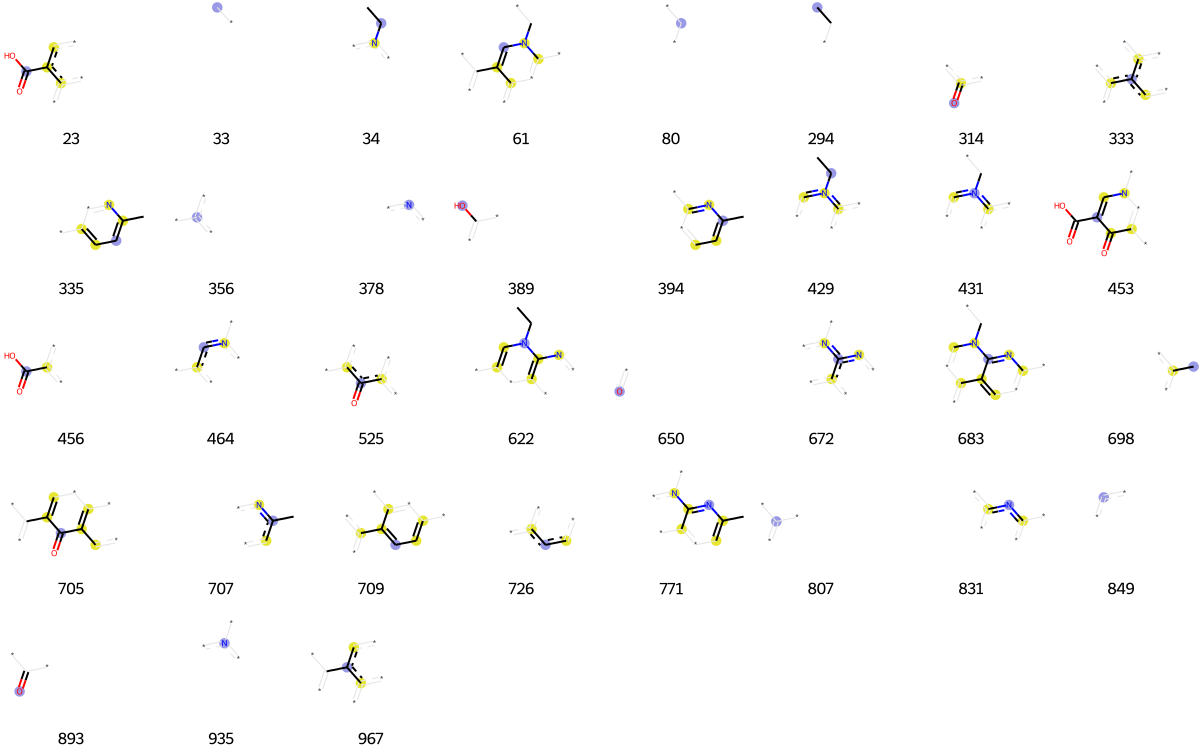

In [232]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [233]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[10,
 13,
 14,
 33,
 45,
 64,
 76,
 77,
 80,
 129,
 175,
 203,
 246,
 252,
 284,
 294,
 310,
 322,
 350,
 352,
 356,
 365,
 392,
 428,
 452,
 477,
 488,
 642,
 650,
 692,
 695,
 726,
 733,
 794,
 796,
 807,
 830,
 849,
 870,
 875,
 893,
 935,
 945,
 984,
 992,
 1010,
 1017]

In [234]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[1,
 13,
 29,
 33,
 35,
 65,
 80,
 116,
 117,
 121,
 128,
 143,
 175,
 193,
 227,
 233,
 243,
 268,
 283,
 294,
 298,
 346,
 368,
 388,
 394,
 403,
 433,
 442,
 463,
 486,
 514,
 531,
 573,
 607,
 650,
 656,
 669,
 689,
 739,
 769,
 794,
 796,
 807,
 832,
 893,
 895,
 897,
 926,
 935,
 1019,
 1020]

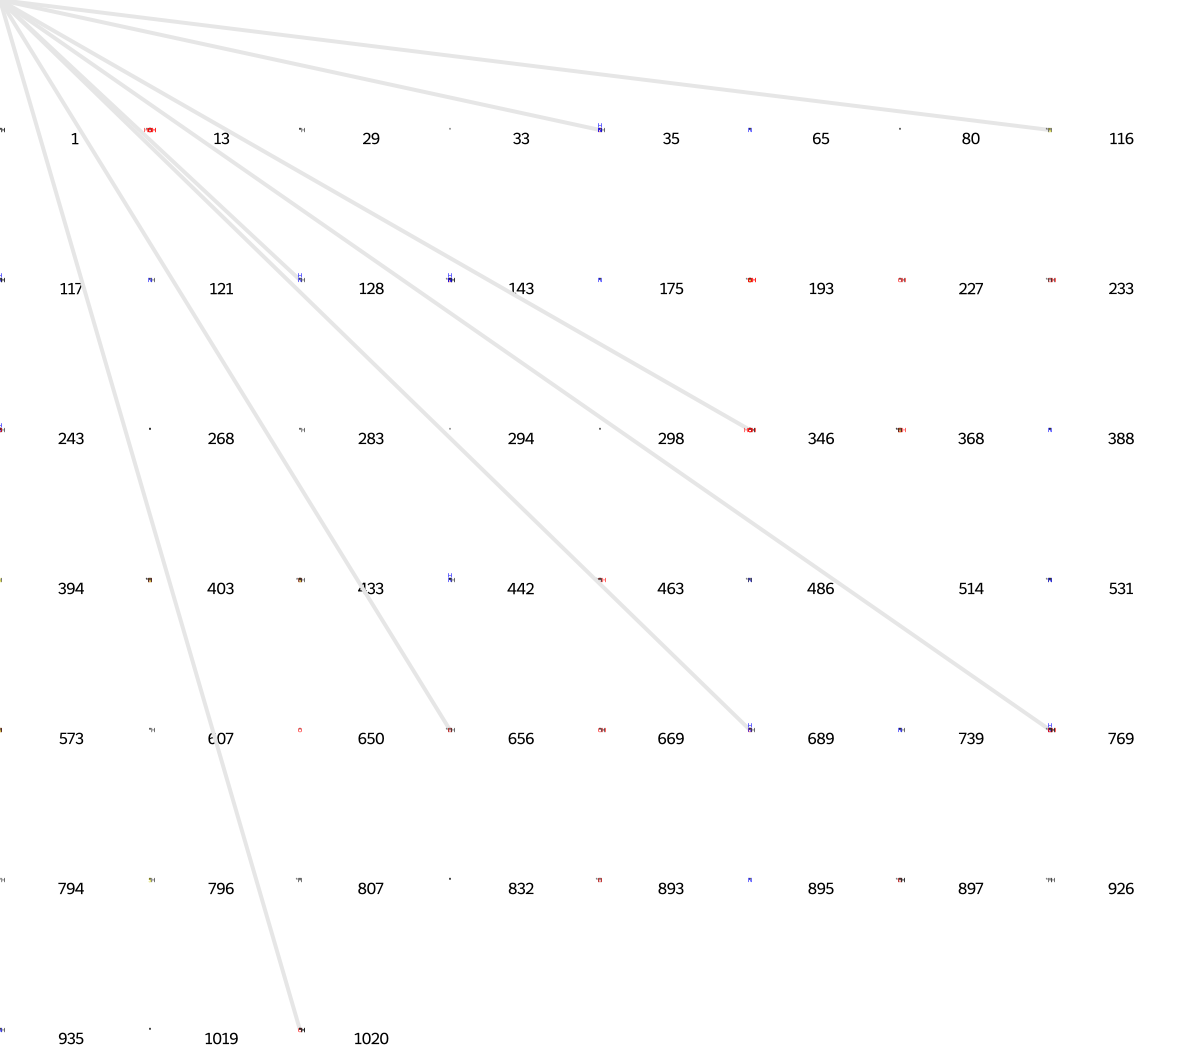

In [235]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [236]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[48,
 90,
 147,
 171,
 192,
 314,
 347,
 356,
 377,
 378,
 416,
 428,
 433,
 511,
 650,
 699,
 721,
 791,
 816,
 849,
 904,
 908]

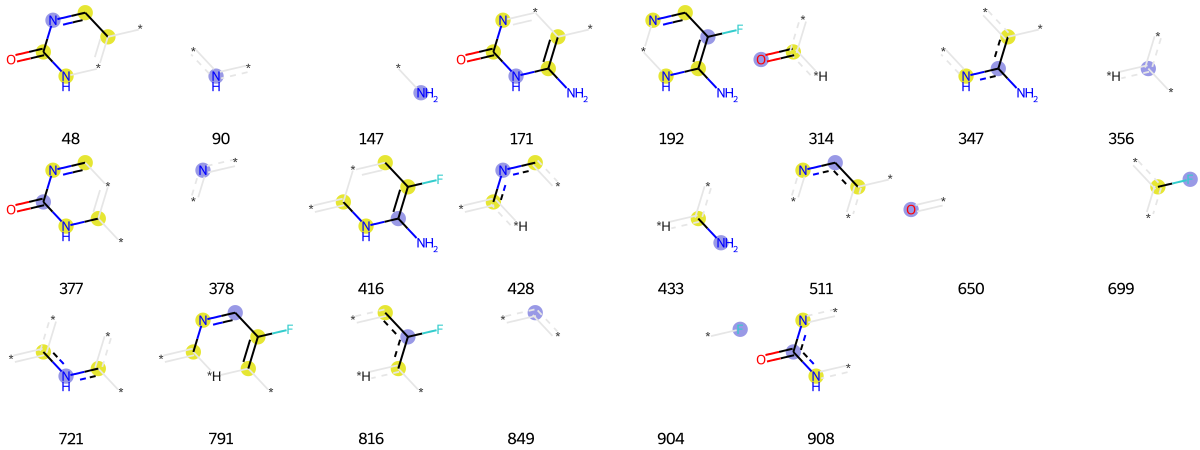

In [237]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [238]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[1,
 33,
 36,
 64,
 88,
 90,
 114,
 119,
 145,
 175,
 218,
 233,
 262,
 314,
 328,
 333,
 352,
 356,
 380,
 392,
 407,
 419,
 429,
 439,
 456,
 464,
 484,
 496,
 546,
 549,
 565,
 570,
 623,
 632,
 633,
 650,
 687,
 726,
 759,
 789,
 801,
 806,
 807,
 809,
 834,
 838,
 849,
 855,
 856,
 875,
 884,
 893,
 904,
 913,
 917,
 926,
 935,
 985]

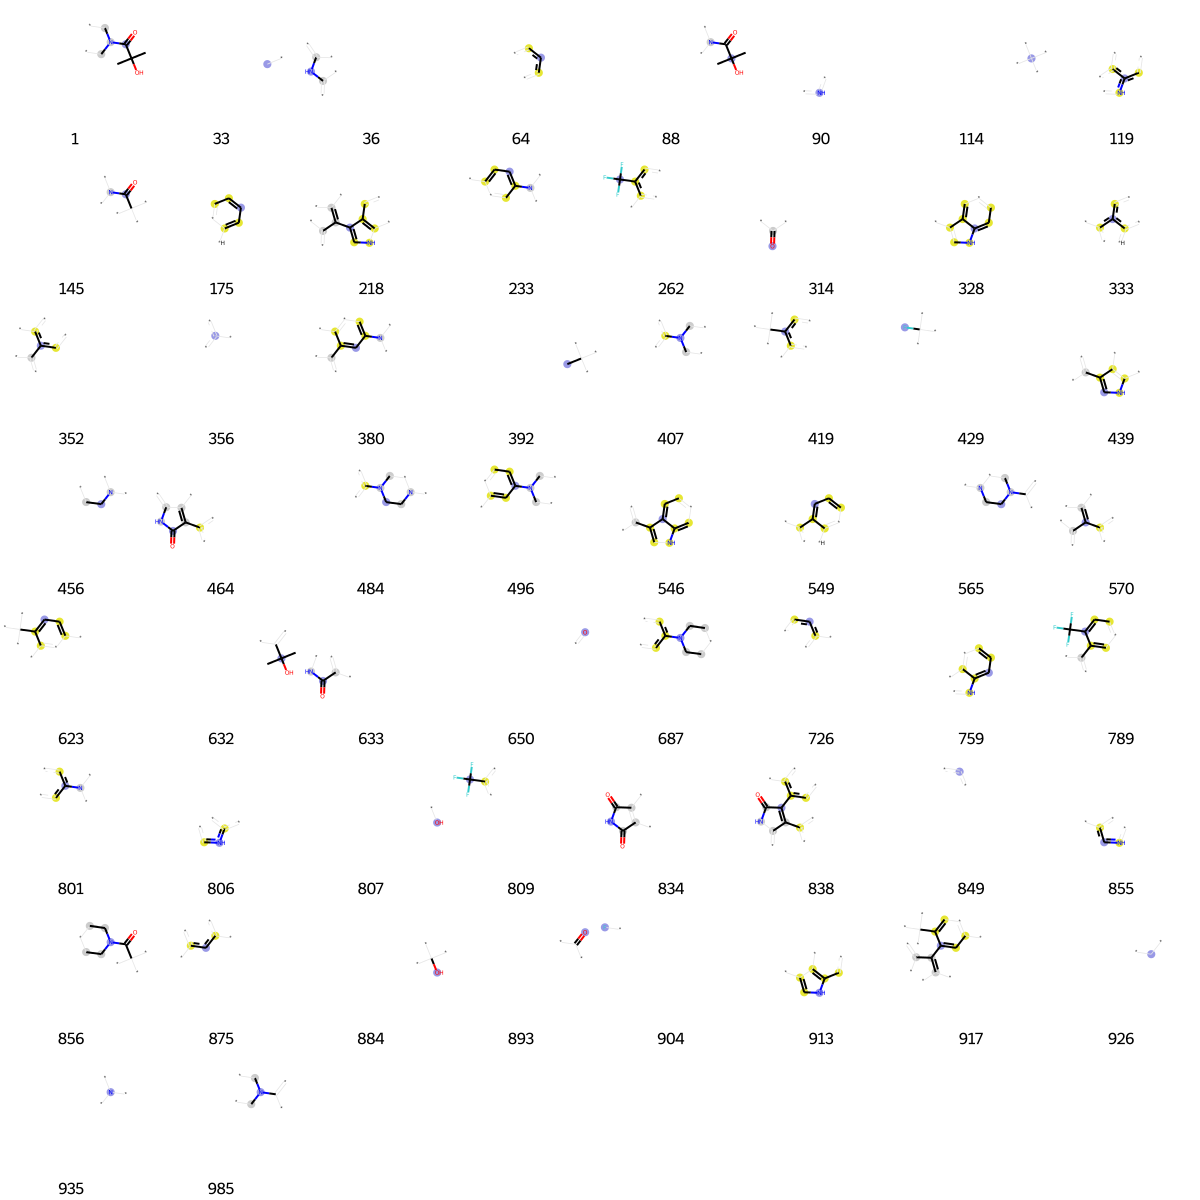

In [239]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [240]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[25,
 63,
 64,
 125,
 128,
 131,
 175,
 205,
 309,
 315,
 318,
 322,
 345,
 356,
 451,
 486,
 578,
 583,
 589,
 632,
 650,
 694,
 711,
 725,
 726,
 807,
 831,
 843,
 846,
 849,
 864,
 875,
 893,
 924,
 967,
 968,
 1009]

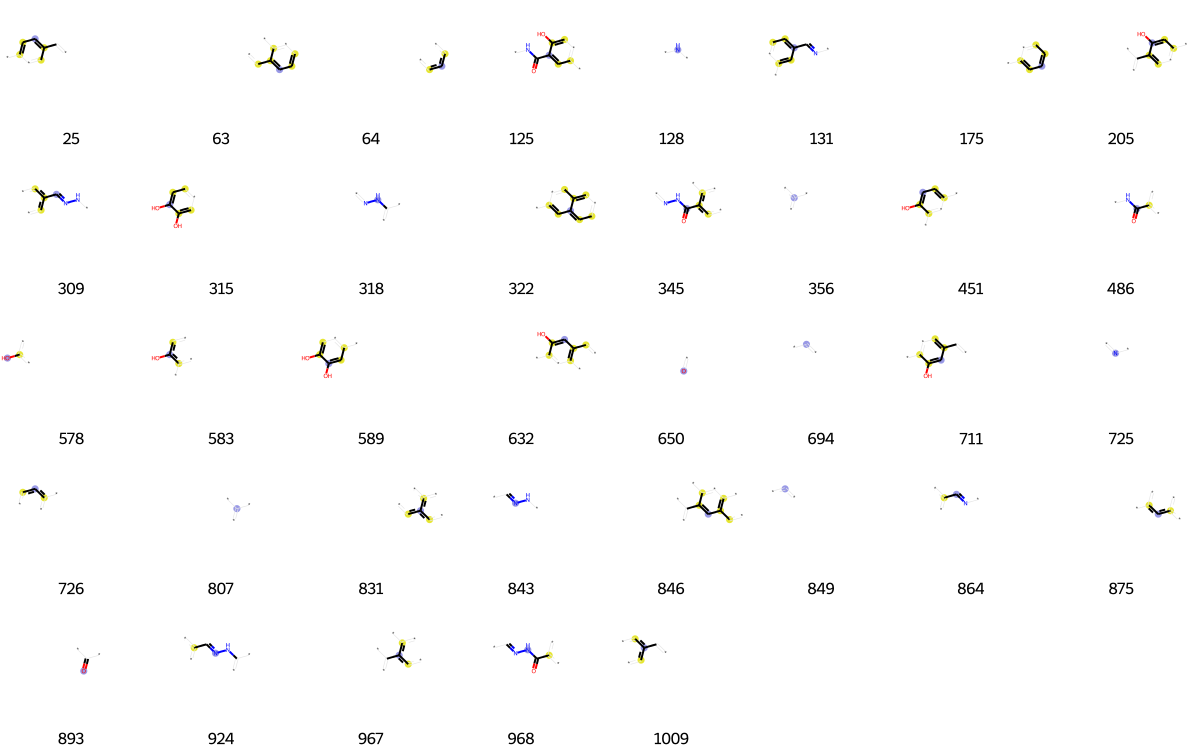

In [241]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [242]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[25,
 33,
 34,
 80,
 94,
 114,
 118,
 121,
 140,
 164,
 221,
 249,
 294,
 314,
 356,
 360,
 378,
 416,
 465,
 504,
 512,
 517,
 523,
 549,
 564,
 575,
 584,
 650,
 672,
 694,
 695,
 726,
 771,
 802,
 804,
 831,
 835,
 841,
 849,
 850,
 875,
 935,
 946,
 987,
 1009,
 1017]

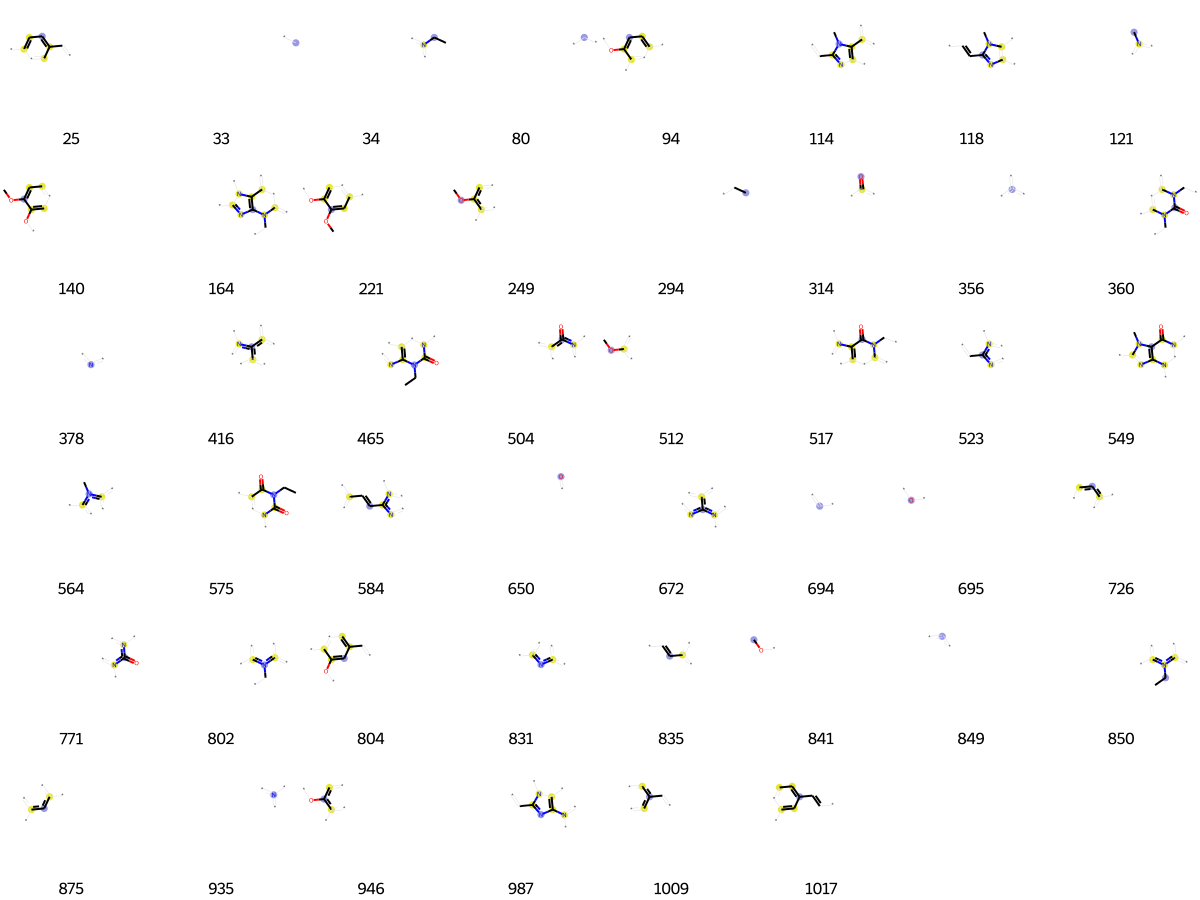

In [243]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [244]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 4,
 33,
 80,
 108,
 153,
 193,
 229,
 242,
 283,
 301,
 321,
 354,
 389,
 407,
 435,
 446,
 456,
 488,
 531,
 559,
 584,
 648,
 650,
 736,
 807,
 865,
 893,
 926,
 935,
 1019]

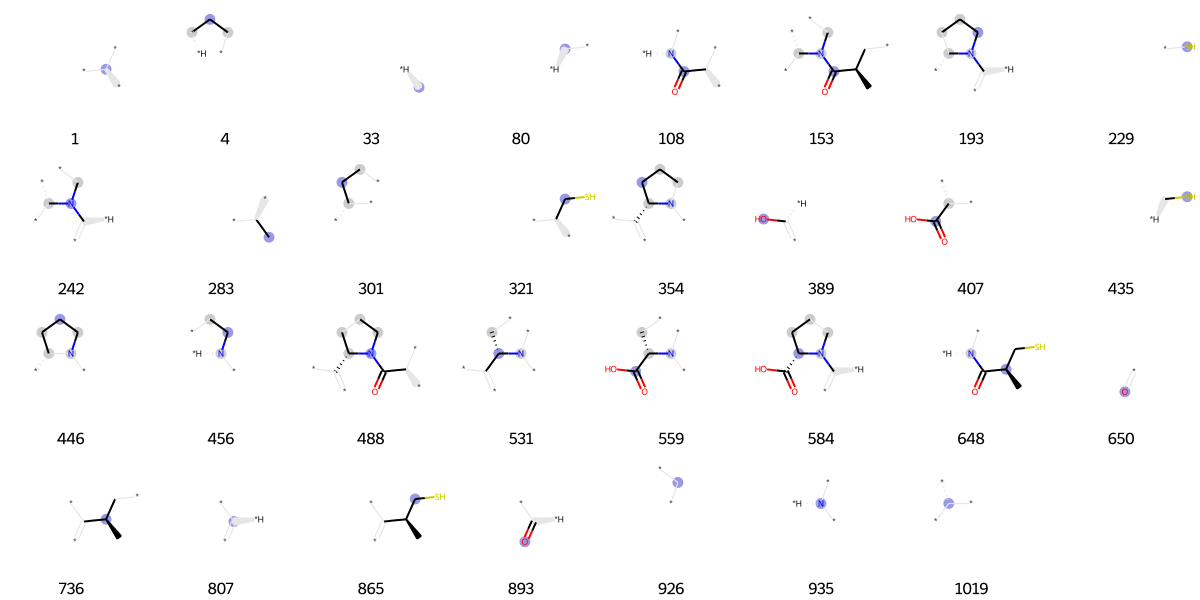

In [245]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [246]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[21,
 23,
 42,
 64,
 80,
 128,
 171,
 175,
 200,
 219,
 250,
 356,
 389,
 392,
 456,
 650,
 667,
 715,
 726,
 730,
 753,
 785,
 790,
 807,
 832,
 838,
 844,
 849,
 858,
 875,
 887,
 893,
 899,
 916,
 939,
 948,
 954,
 964,
 967,
 978]

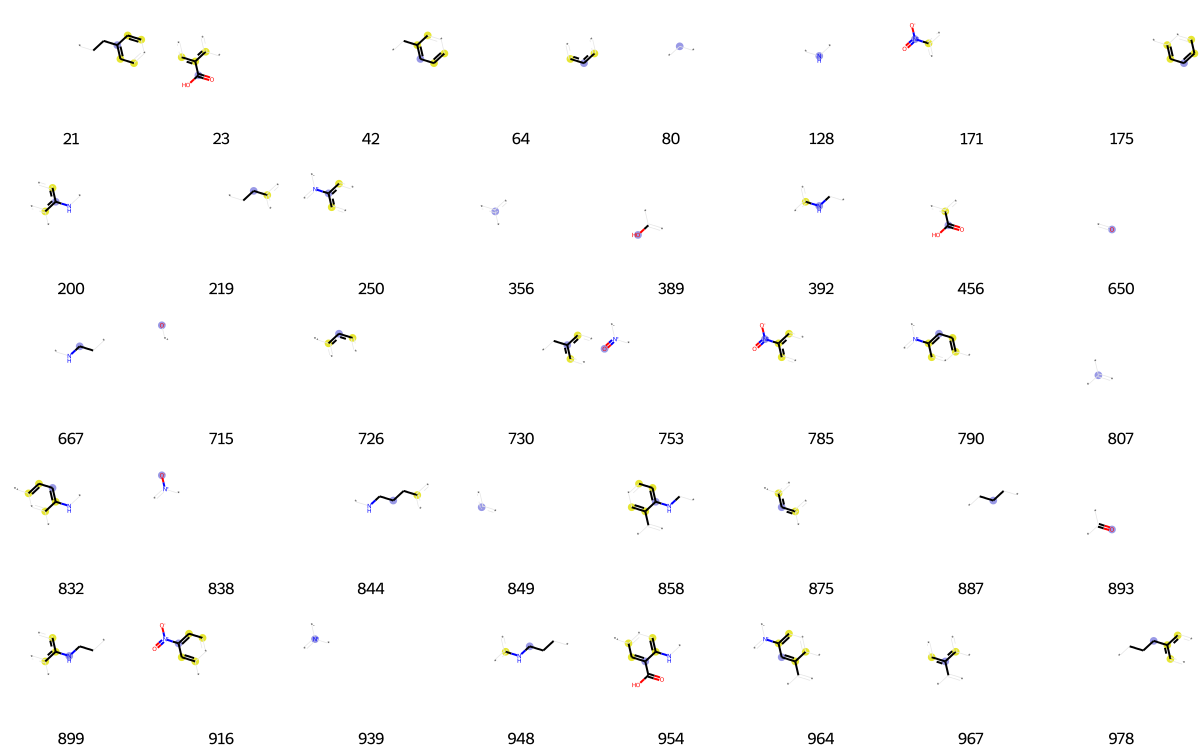

In [247]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [248]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[1,
 3,
 27,
 33,
 36,
 64,
 80,
 90,
 99,
 117,
 128,
 175,
 207,
 236,
 237,
 249,
 255,
 266,
 294,
 313,
 325,
 327,
 356,
 372,
 389,
 469,
 512,
 521,
 543,
 591,
 595,
 639,
 650,
 677,
 679,
 695,
 702,
 713,
 720,
 726,
 733,
 782,
 792,
 794,
 795,
 807,
 813,
 826,
 841,
 849,
 865,
 875,
 876,
 887,
 893,
 911,
 924,
 926,
 946,
 996,
 1011,
 1019]

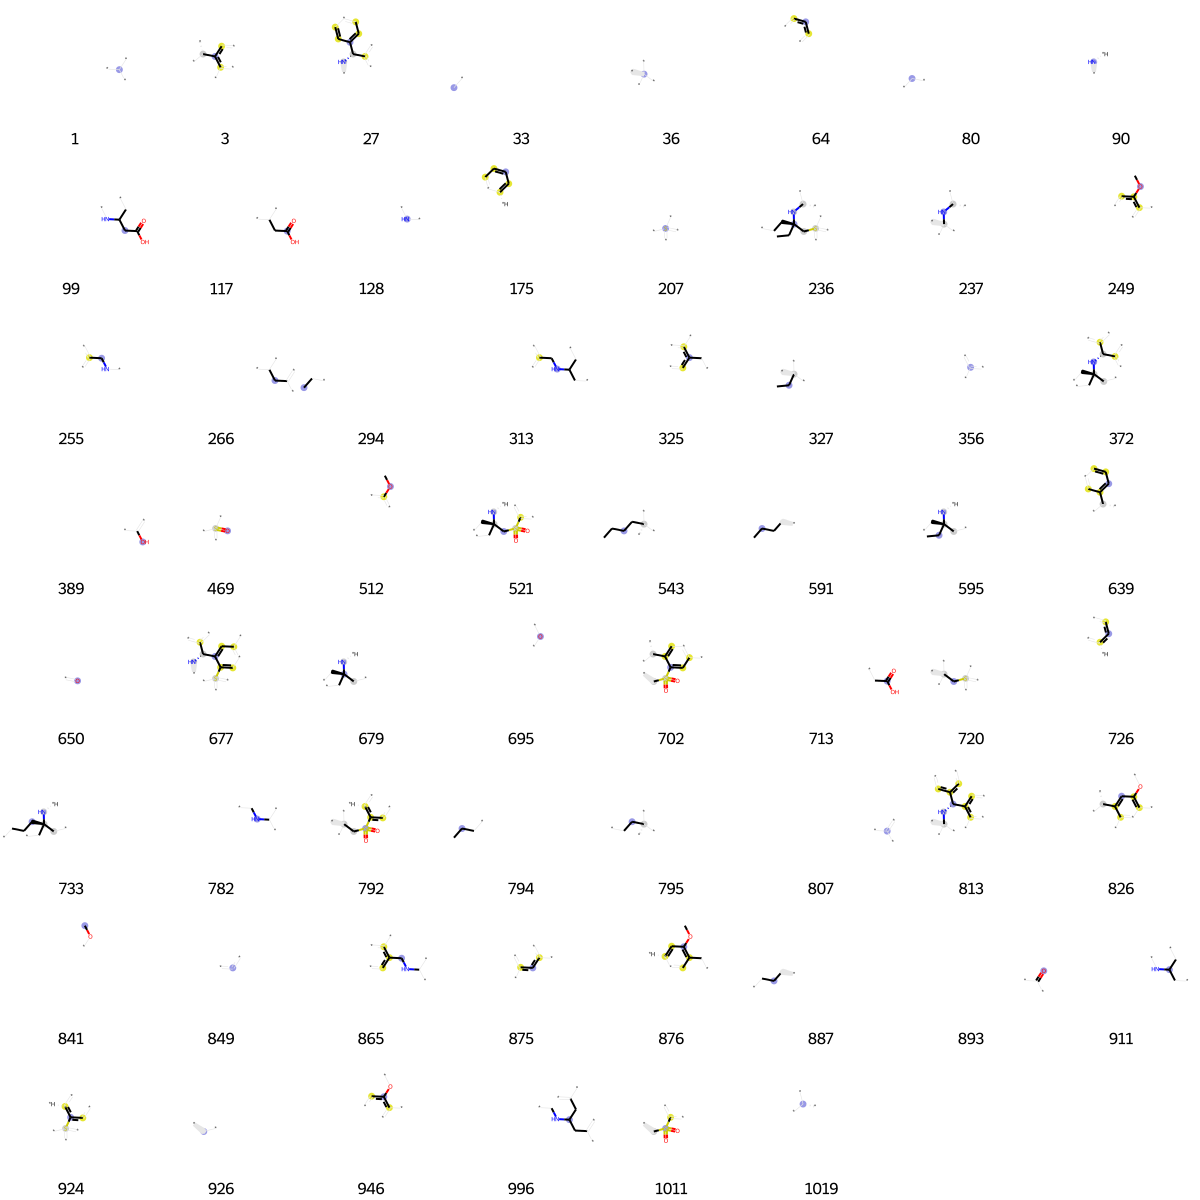

In [249]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [250]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[8,
 46,
 80,
 121,
 128,
 197,
 216,
 265,
 356,
 361,
 381,
 417,
 456,
 458,
 486,
 523,
 561,
 586,
 641,
 650,
 656,
 659,
 667,
 673,
 714,
 726,
 767,
 807,
 816,
 825,
 849,
 893,
 926,
 935,
 950]

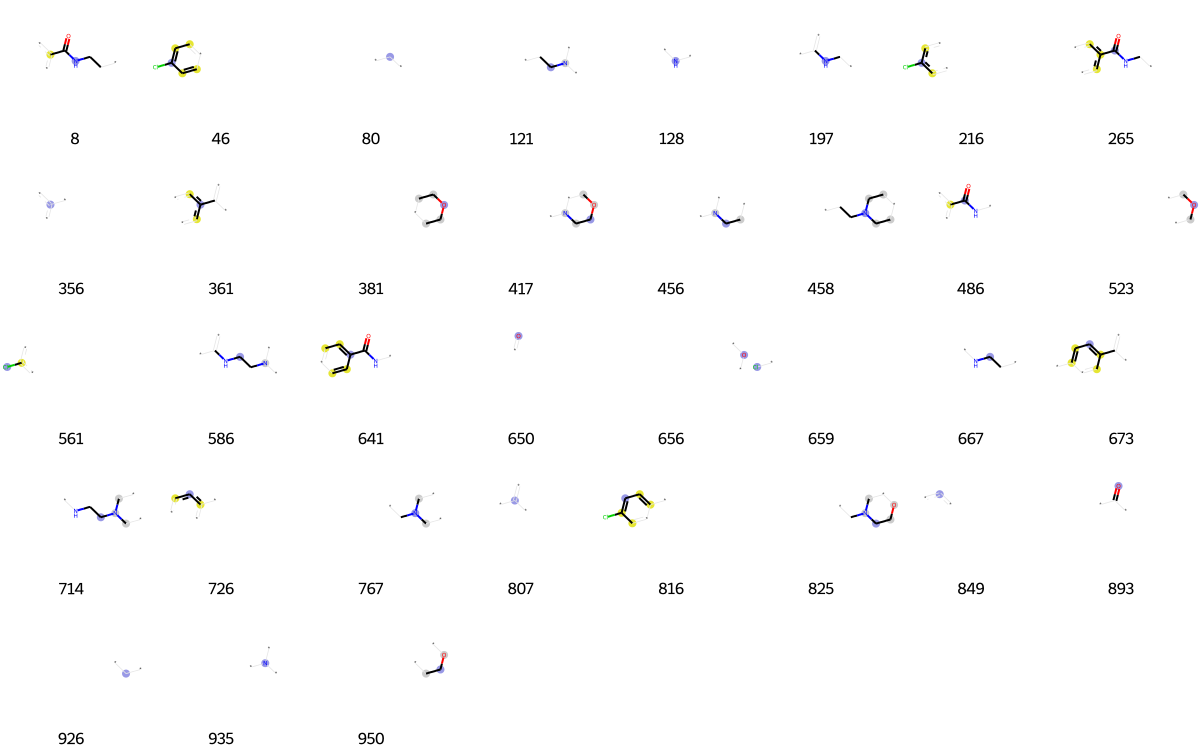

In [251]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [252]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1,
 14,
 33,
 64,
 74,
 86,
 90,
 108,
 121,
 128,
 153,
 175,
 207,
 212,
 226,
 233,
 300,
 327,
 341,
 356,
 361,
 369,
 378,
 381,
 389,
 399,
 407,
 443,
 456,
 484,
 486,
 495,
 513,
 557,
 641,
 650,
 666,
 673,
 687,
 692,
 695,
 726,
 771,
 783,
 792,
 801,
 807,
 830,
 841,
 849,
 875,
 893,
 922,
 924,
 926,
 935,
 966,
 980,
 985]

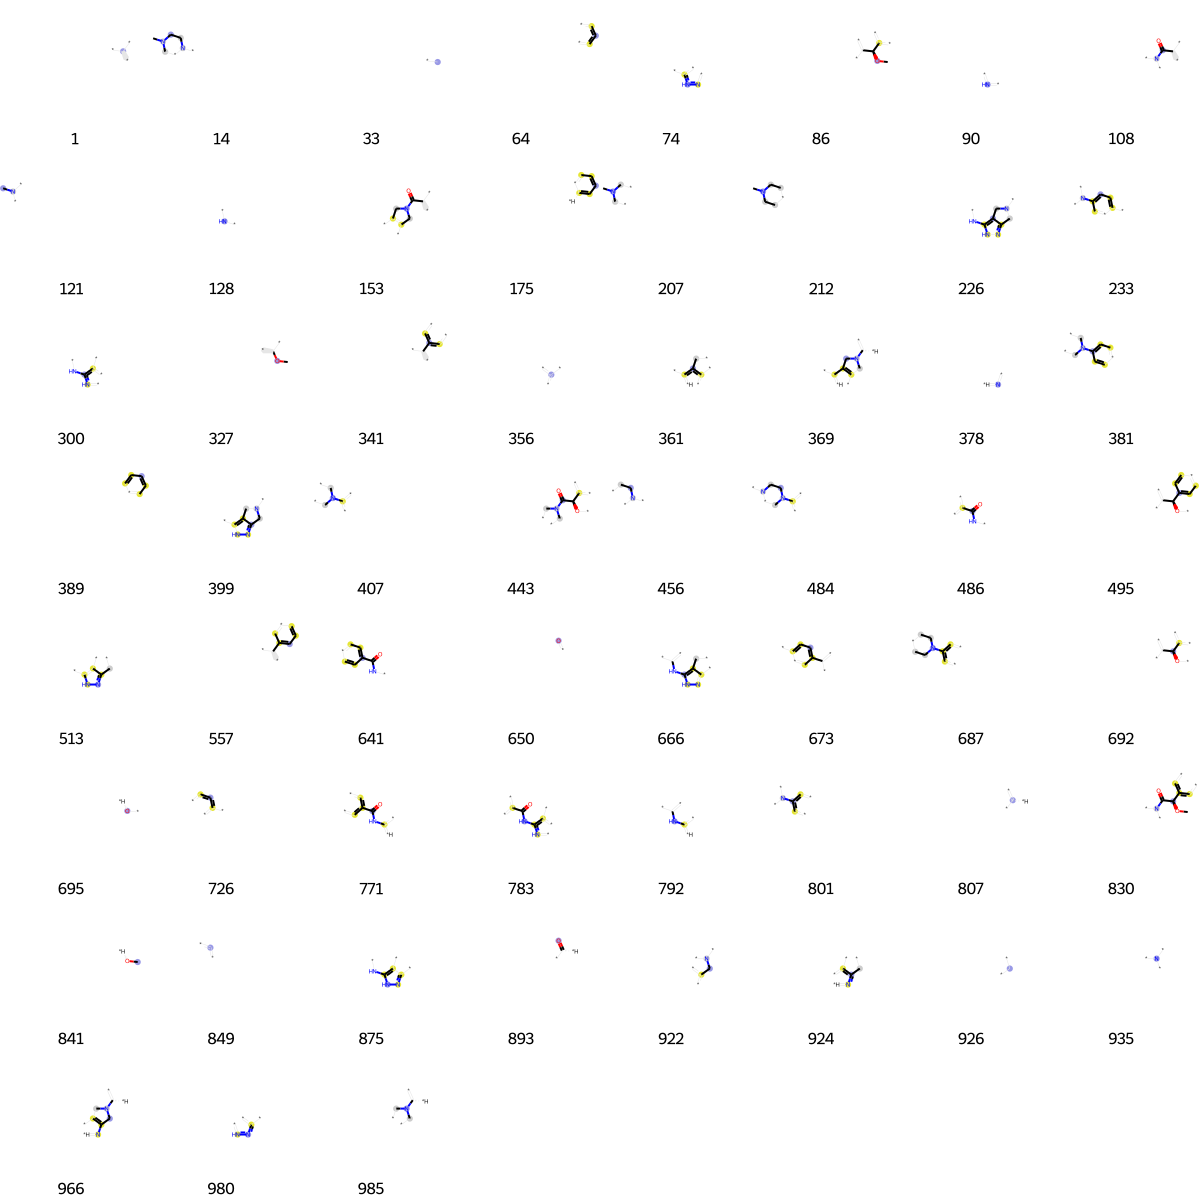

In [253]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [254]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[13,
 80,
 210,
 222,
 233,
 289,
 299,
 322,
 356,
 463,
 489,
 492,
 524,
 578,
 610,
 656,
 695,
 696,
 718,
 726,
 740,
 745,
 754,
 807,
 819,
 820,
 849,
 897,
 953,
 964,
 1019]

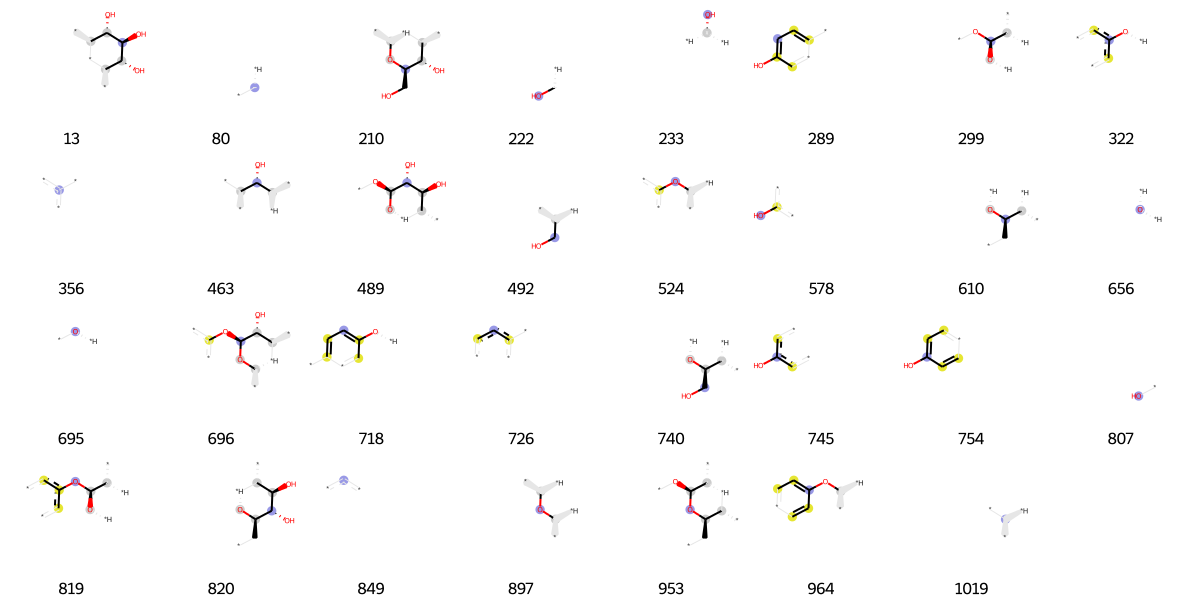

In [255]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [256]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[15,
 64,
 80,
 128,
 175,
 189,
 200,
 202,
 284,
 325,
 342,
 356,
 366,
 381,
 383,
 491,
 555,
 561,
 573,
 650,
 659,
 672,
 701,
 715,
 726,
 785,
 807,
 849,
 857,
 893,
 974,
 976]

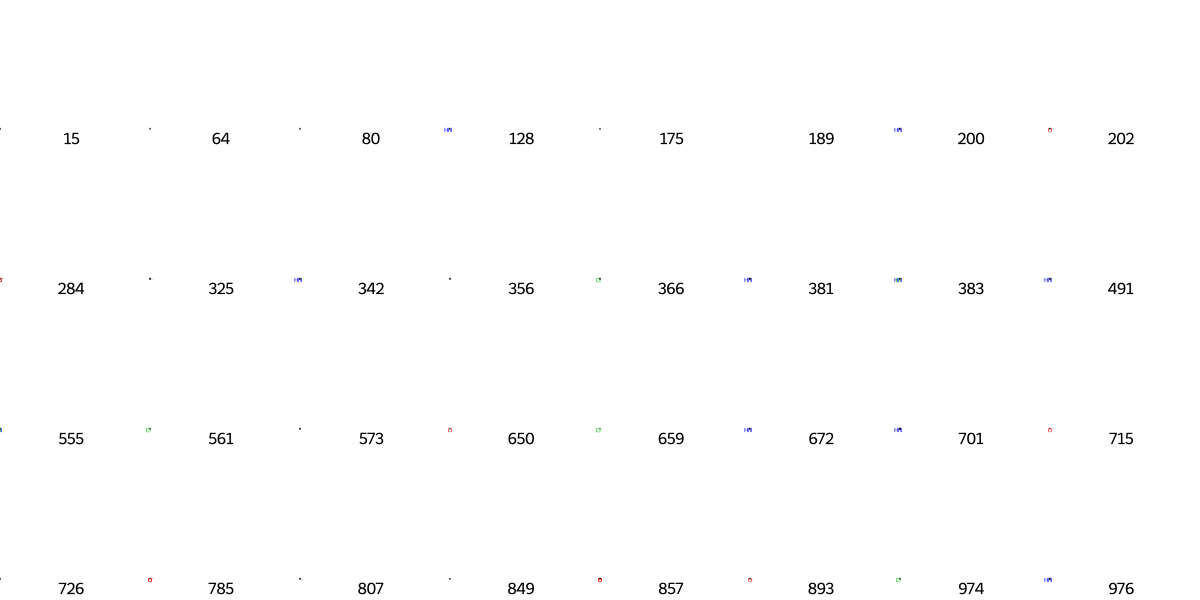

In [257]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [258]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[33,
 36,
 37,
 46,
 72,
 76,
 77,
 80,
 84,
 102,
 112,
 151,
 165,
 185,
 216,
 233,
 276,
 322,
 349,
 356,
 366,
 367,
 378,
 381,
 399,
 407,
 428,
 439,
 456,
 460,
 484,
 494,
 561,
 565,
 573,
 579,
 630,
 650,
 656,
 659,
 687,
 695,
 706,
 718,
 726,
 749,
 766,
 801,
 807,
 816,
 842,
 843,
 846,
 849,
 875,
 893,
 899,
 912,
 919,
 926,
 932,
 935,
 956,
 985,
 1005,
 1017,
 1019]

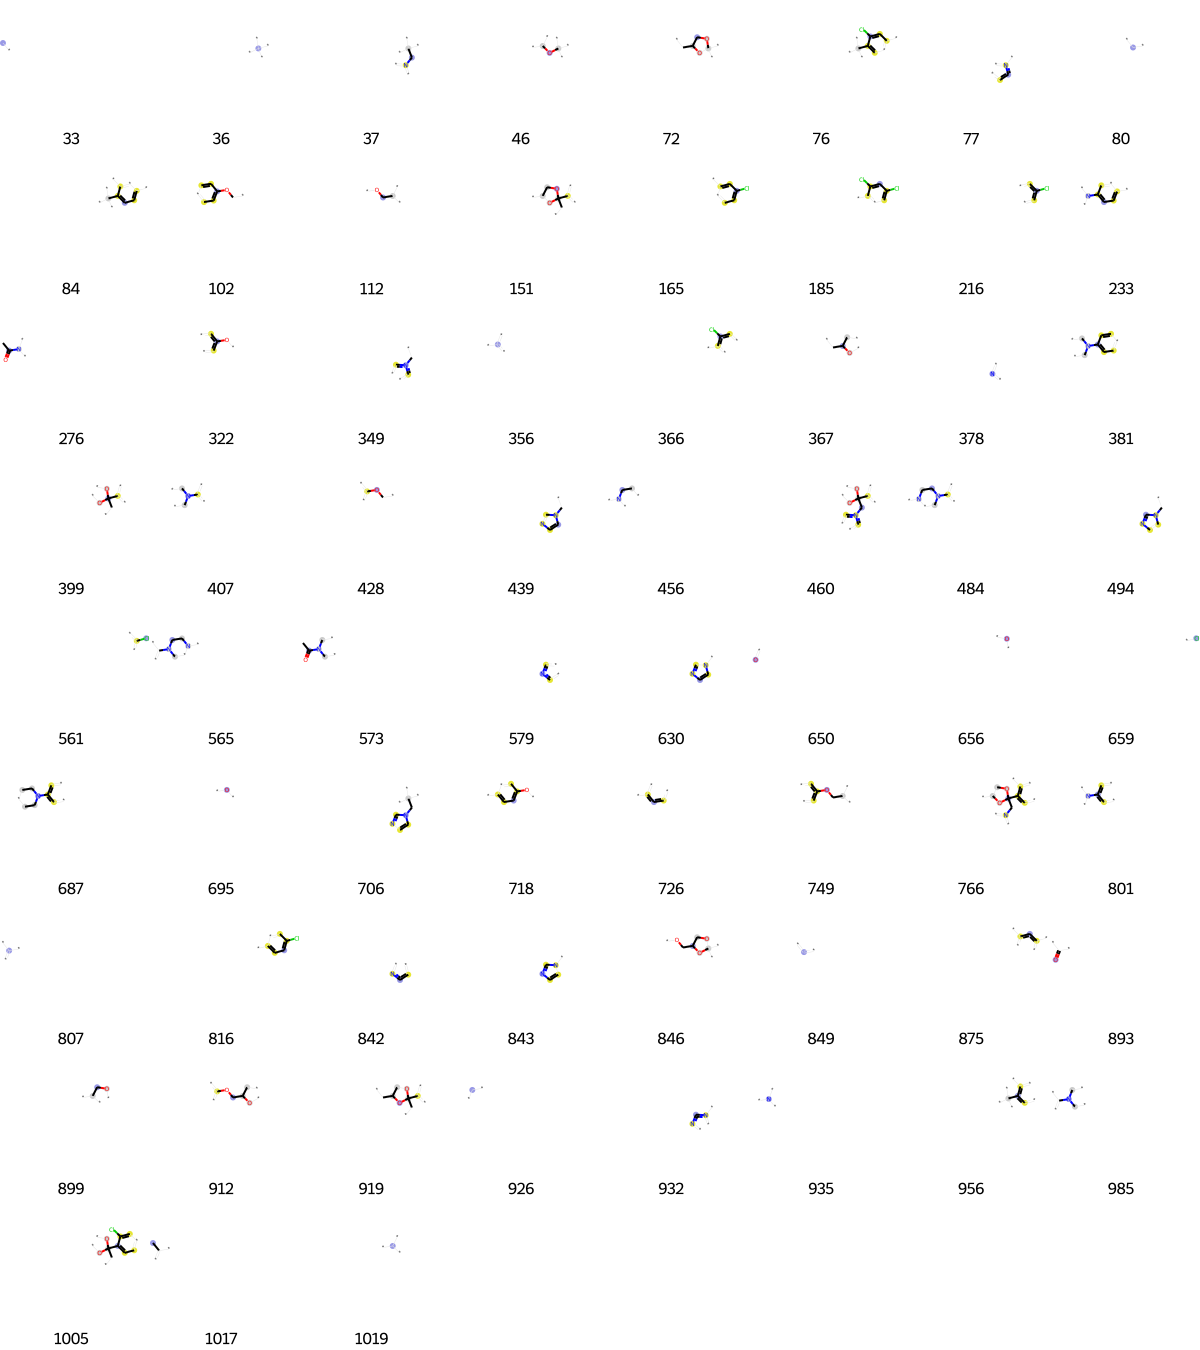

In [259]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [260]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[33,
 36,
 64,
 80,
 90,
 149,
 151,
 175,
 197,
 212,
 258,
 259,
 294,
 327,
 343,
 356,
 378,
 428,
 431,
 457,
 482,
 622,
 656,
 684,
 726,
 728,
 792,
 806,
 840,
 842,
 849,
 881,
 926,
 927,
 940,
 965,
 995]

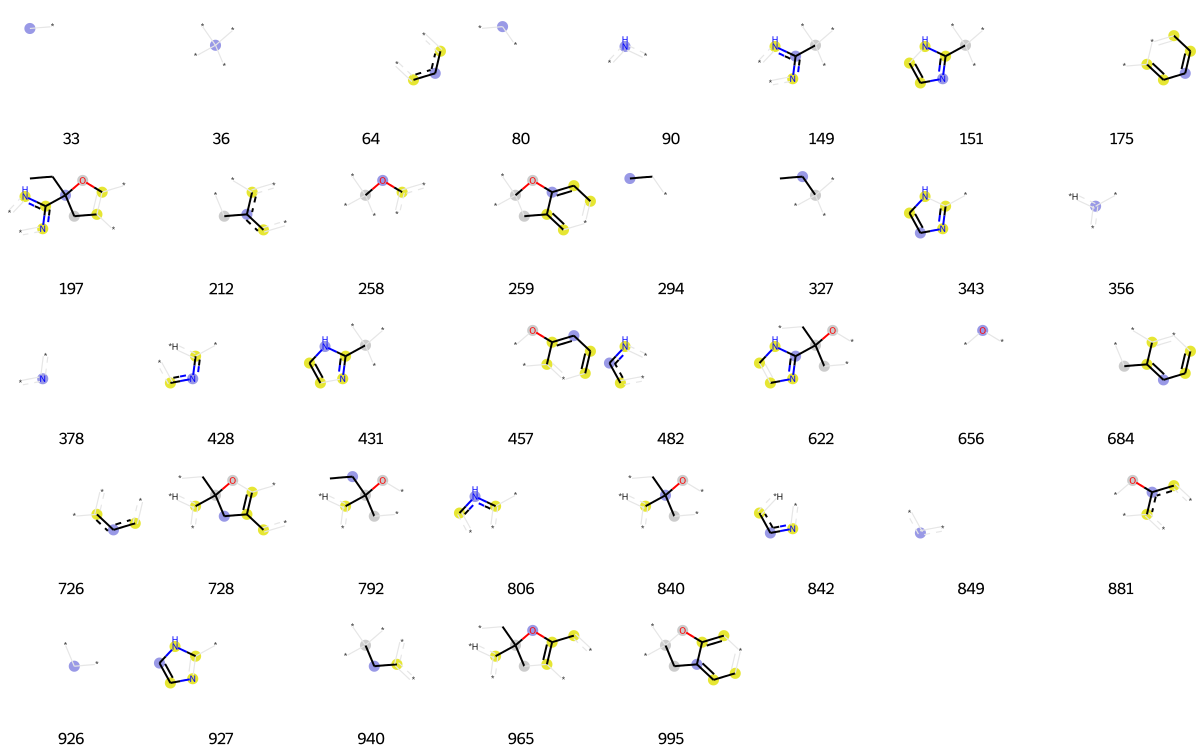

In [261]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [262]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[13,
 15,
 33,
 36,
 42,
 53,
 64,
 72,
 80,
 90,
 120,
 123,
 145,
 147,
 171,
 175,
 188,
 200,
 250,
 255,
 268,
 270,
 280,
 288,
 295,
 297,
 356,
 389,
 395,
 440,
 463,
 484,
 502,
 507,
 568,
 586,
 627,
 639,
 644,
 647,
 650,
 656,
 663,
 695,
 696,
 698,
 715,
 726,
 730,
 753,
 785,
 801,
 807,
 810,
 838,
 849,
 871,
 875,
 880,
 881,
 893,
 916,
 926,
 927,
 939,
 972,
 987,
 1005,
 1008,
 1019]

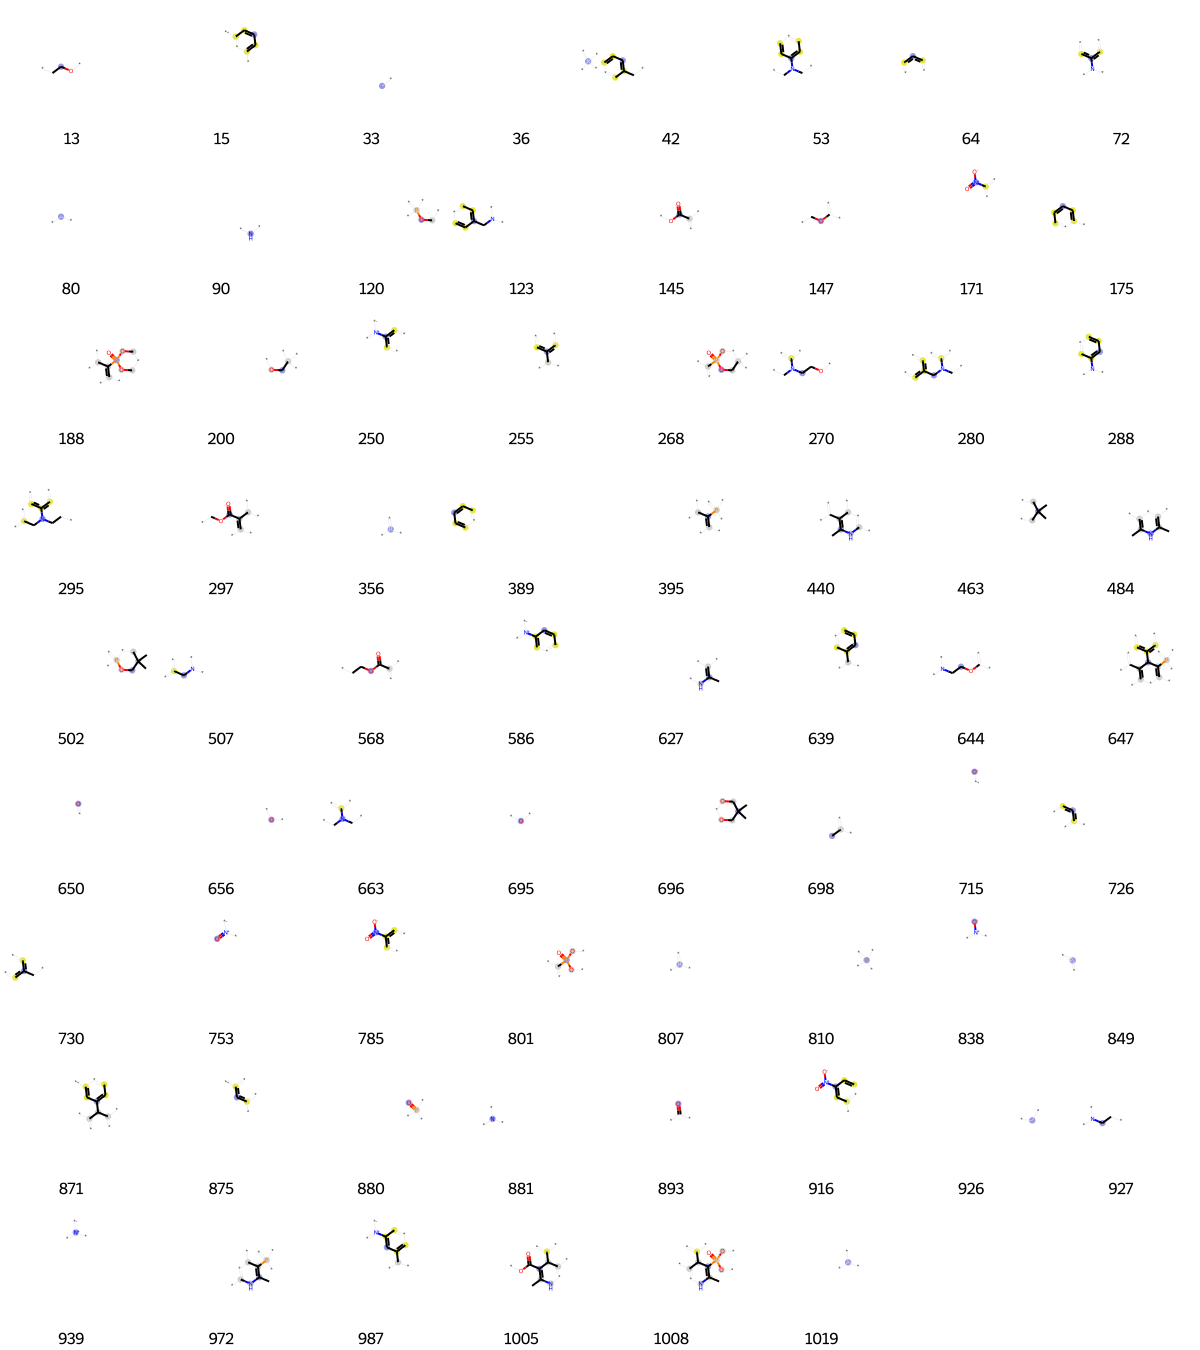

In [263]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [264]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[7,
 10,
 33,
 36,
 38,
 64,
 77,
 80,
 90,
 106,
 128,
 136,
 142,
 175,
 245,
 314,
 328,
 352,
 356,
 378,
 387,
 389,
 446,
 547,
 576,
 650,
 707,
 724,
 726,
 736,
 740,
 807,
 849,
 869,
 893,
 958,
 984,
 1017,
 1019]

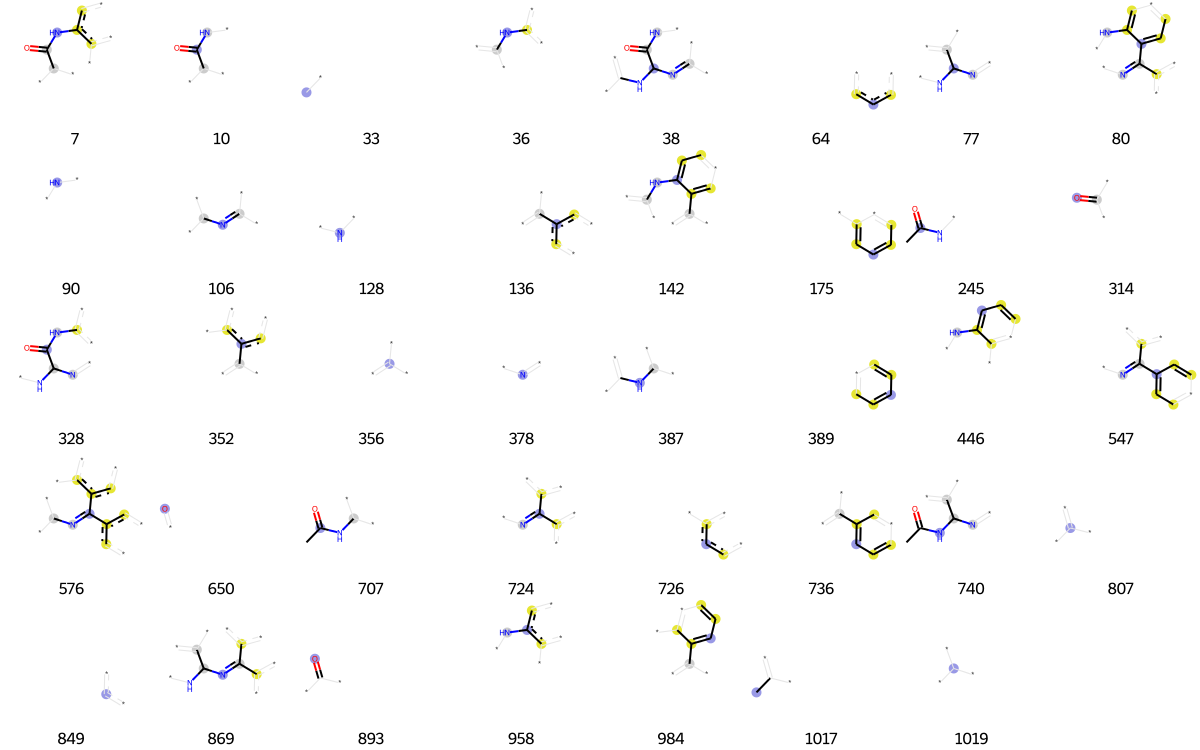

In [265]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [266]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[0,
 1,
 5,
 15,
 33,
 41,
 64,
 90,
 104,
 116,
 128,
 184,
 189,
 191,
 202,
 208,
 227,
 246,
 263,
 268,
 283,
 285,
 302,
 314,
 326,
 340,
 356,
 361,
 362,
 389,
 430,
 438,
 456,
 470,
 483,
 485,
 544,
 550,
 614,
 650,
 652,
 686,
 687,
 689,
 703,
 705,
 715,
 726,
 792,
 793,
 807,
 849,
 871,
 875,
 893,
 898,
 926,
 934,
 935,
 936,
 960,
 961,
 1019]

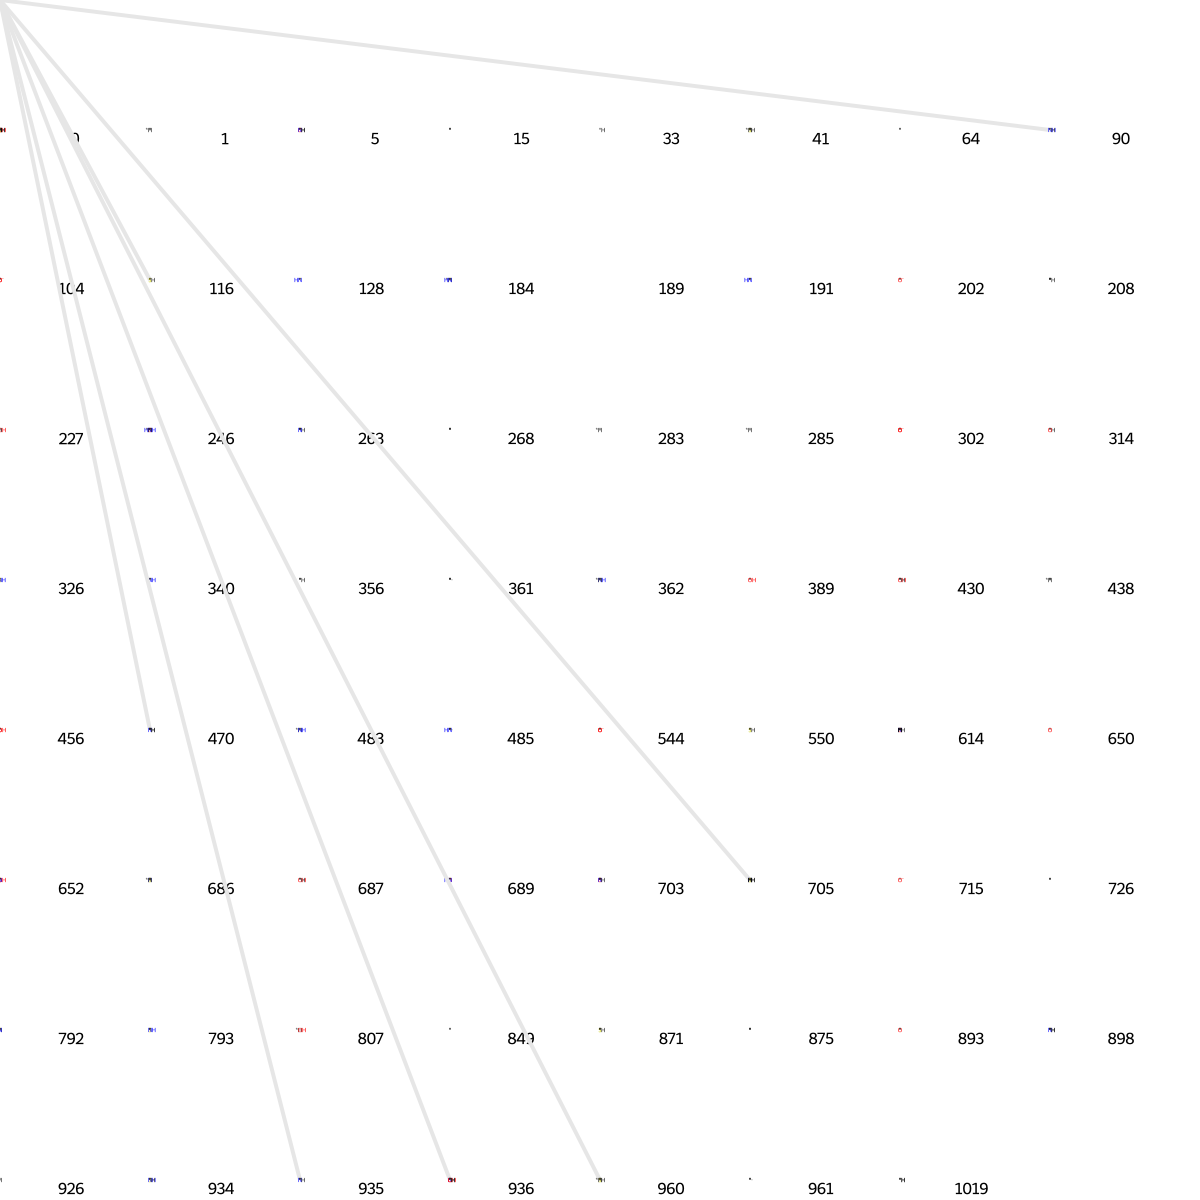

In [267]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [268]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[23,
 33,
 48,
 80,
 130,
 147,
 290,
 298,
 301,
 308,
 314,
 322,
 326,
 333,
 338,
 356,
 370,
 378,
 389,
 398,
 407,
 414,
 444,
 445,
 453,
 456,
 464,
 496,
 525,
 577,
 587,
 612,
 615,
 624,
 650,
 672,
 689,
 695,
 699,
 705,
 725,
 739,
 785,
 807,
 816,
 831,
 841,
 849,
 850,
 875,
 886,
 893,
 895,
 904,
 922,
 926,
 934,
 935,
 967,
 981,
 1019]

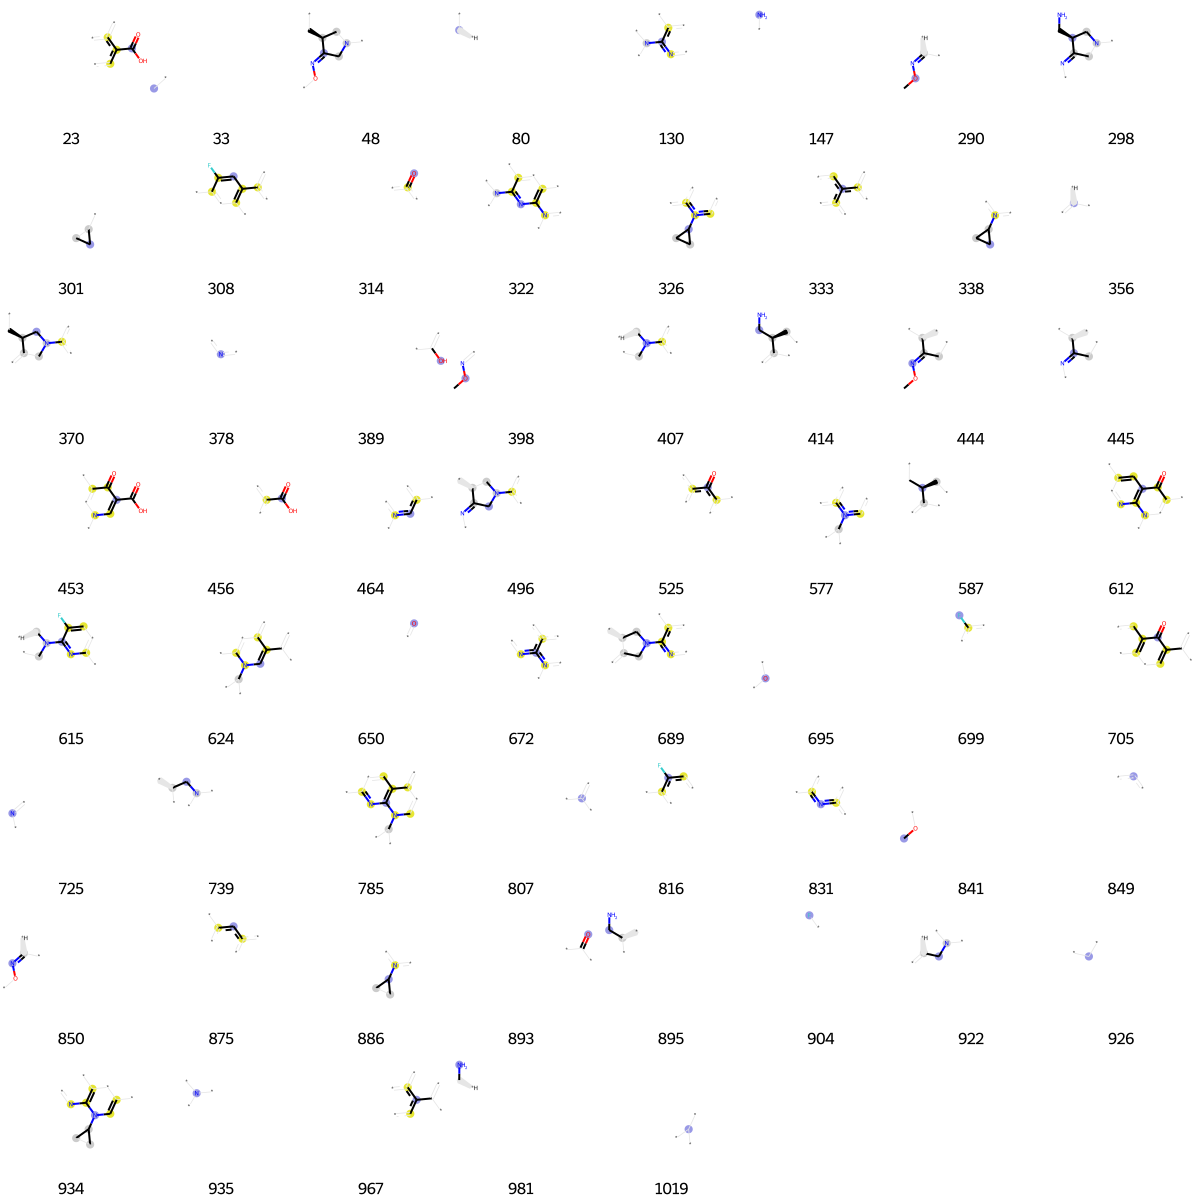

In [269]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [270]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[1,
 18,
 114,
 117,
 128,
 175,
 227,
 231,
 308,
 650,
 659,
 803,
 807,
 893,
 965,
 984,
 1019]

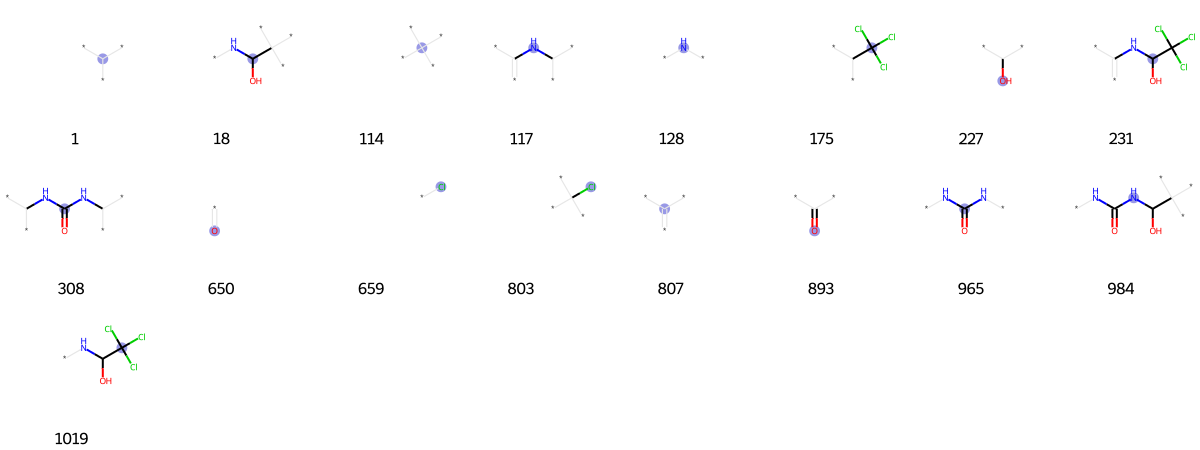

In [271]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [272]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[1,
 10,
 36,
 41,
 80,
 90,
 93,
 106,
 115,
 119,
 121,
 128,
 140,
 147,
 181,
 182,
 203,
 222,
 233,
 266,
 268,
 282,
 301,
 314,
 356,
 373,
 378,
 382,
 385,
 387,
 396,
 397,
 431,
 433,
 435,
 443,
 470,
 492,
 493,
 502,
 513,
 525,
 550,
 594,
 632,
 633,
 650,
 665,
 694,
 697,
 702,
 739,
 772,
 774,
 786,
 795,
 797,
 807,
 816,
 842,
 869,
 878,
 882,
 887,
 893,
 925,
 926,
 934,
 968,
 976,
 978,
 981,
 1019]

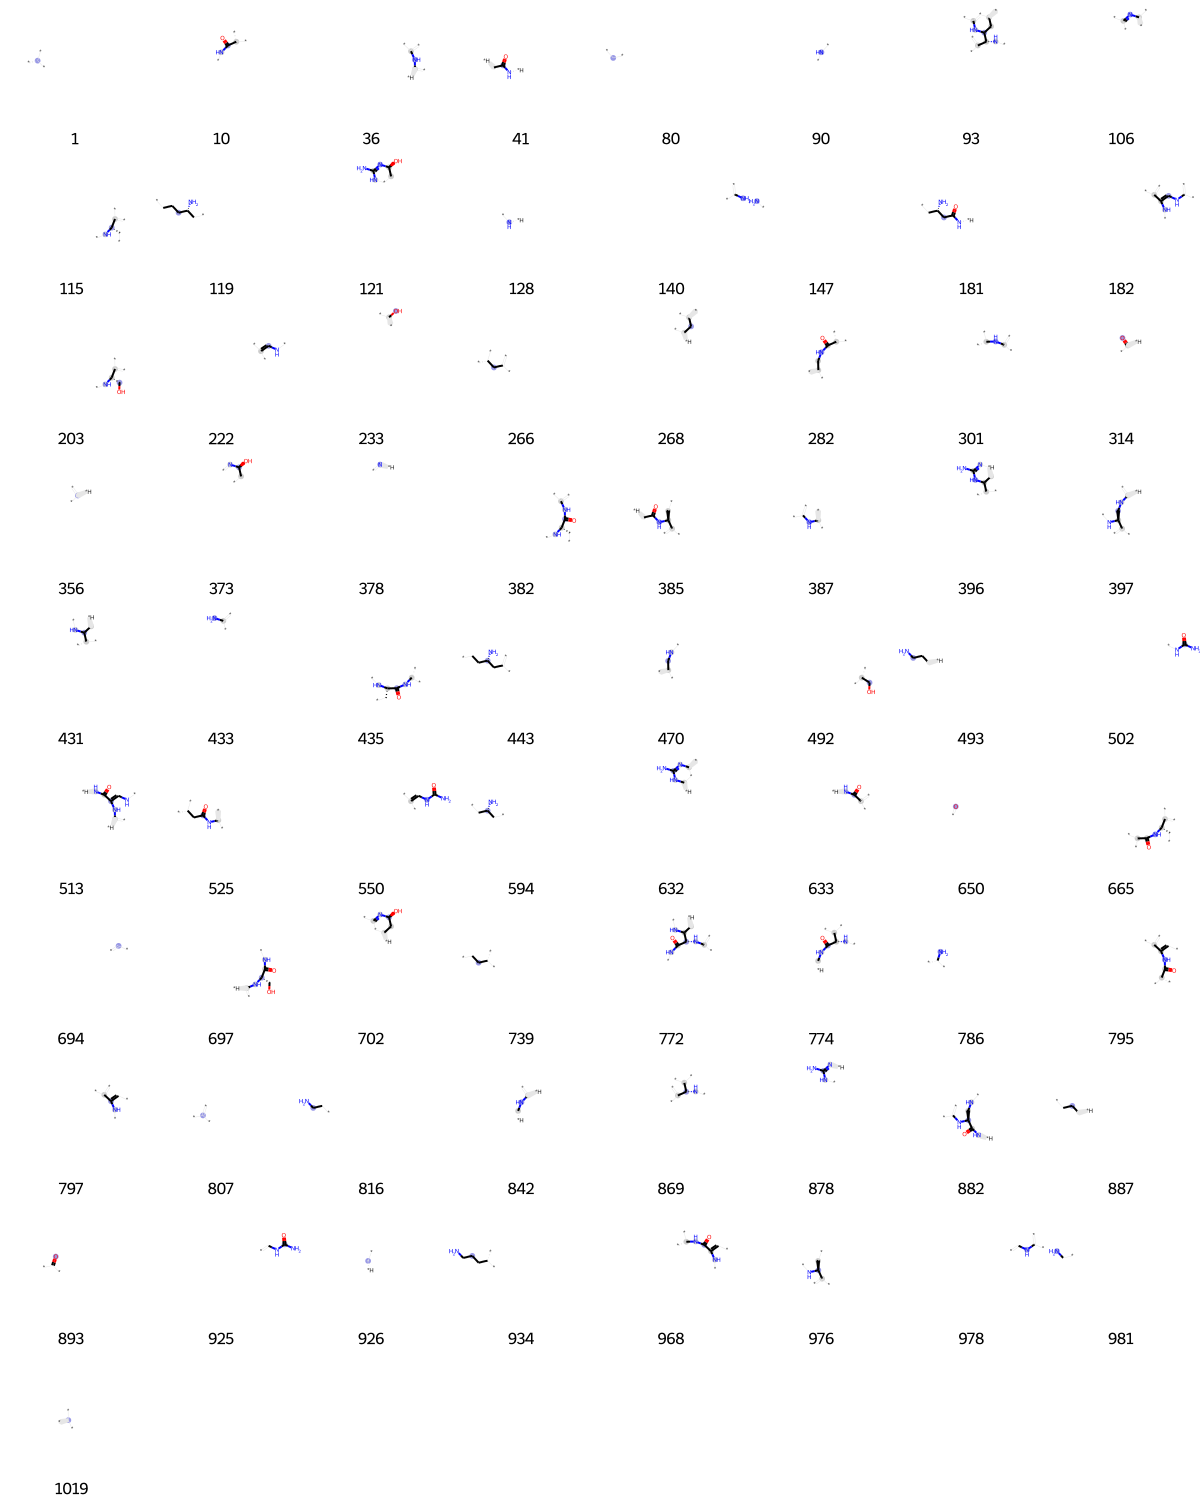

In [273]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [274]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[3,
 9,
 33,
 36,
 64,
 111,
 149,
 175,
 188,
 229,
 250,
 277,
 312,
 314,
 356,
 364,
 370,
 371,
 391,
 429,
 457,
 463,
 558,
 650,
 656,
 657,
 677,
 726,
 730,
 736,
 751,
 786,
 792,
 849,
 881,
 926,
 940,
 1019]

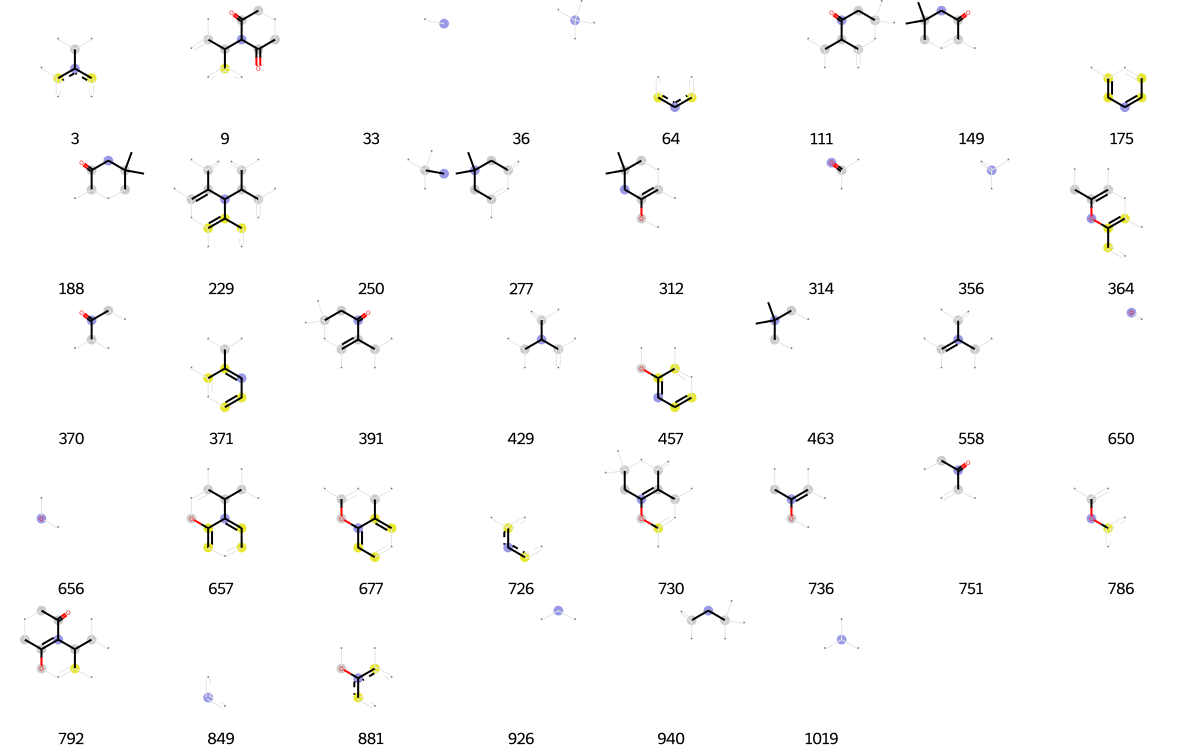

In [275]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [276]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[1,
 24,
 33,
 60,
 73,
 80,
 82,
 128,
 165,
 216,
 251,
 273,
 276,
 283,
 294,
 322,
 333,
 356,
 378,
 381,
 389,
 445,
 482,
 512,
 514,
 557,
 561,
 615,
 620,
 659,
 687,
 690,
 695,
 709,
 718,
 726,
 739,
 781,
 790,
 816,
 823,
 831,
 841,
 849,
 875,
 881,
 887,
 927,
 932,
 948,
 957,
 961,
 974,
 994]

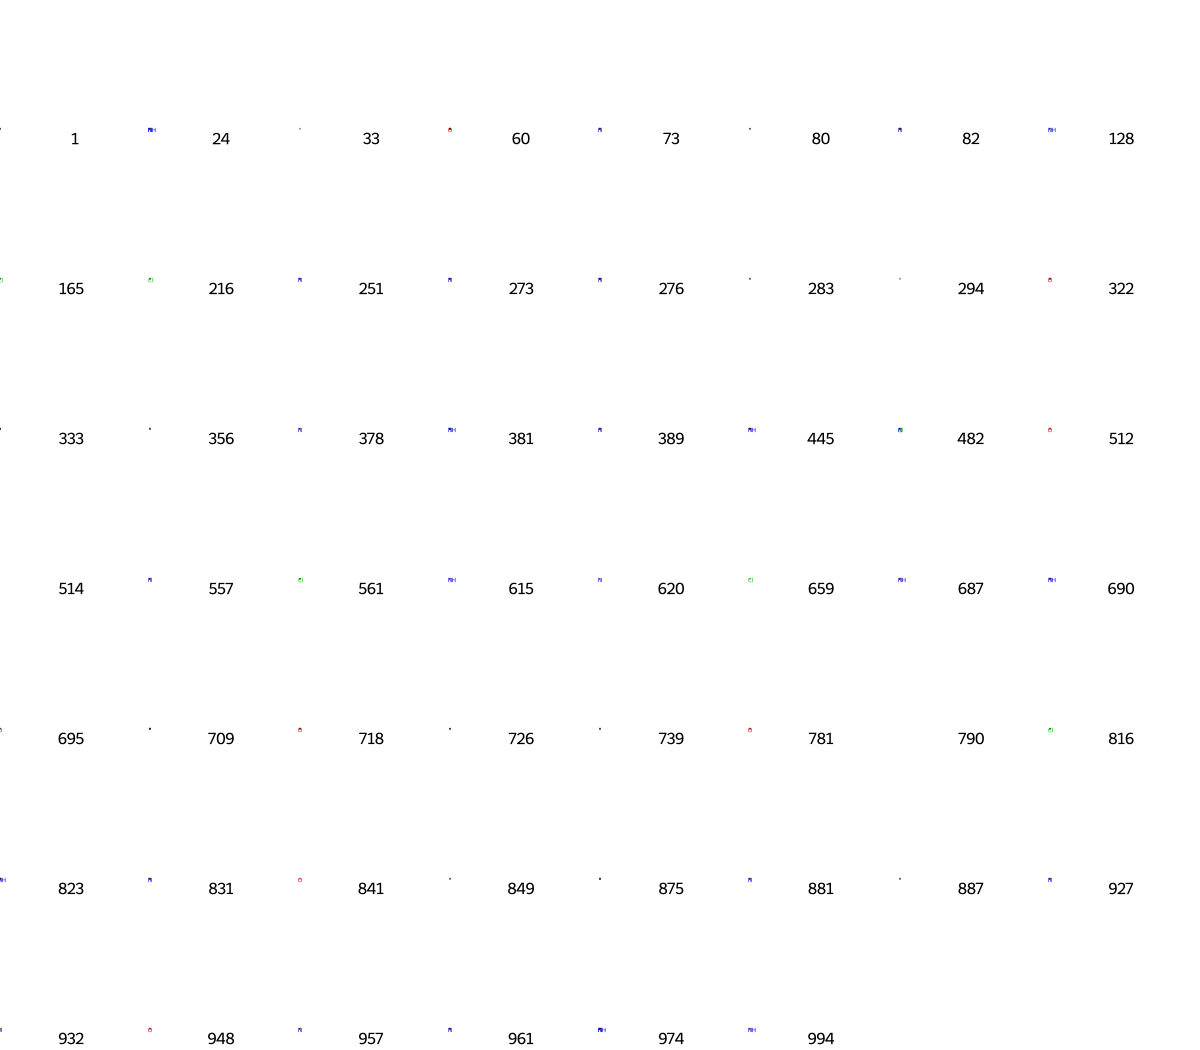

In [277]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [278]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[1,
 5,
 18,
 33,
 36,
 56,
 64,
 87,
 90,
 117,
 125,
 126,
 128,
 130,
 175,
 181,
 189,
 202,
 210,
 218,
 233,
 250,
 255,
 284,
 305,
 314,
 317,
 332,
 341,
 345,
 356,
 363,
 387,
 389,
 456,
 557,
 573,
 585,
 590,
 611,
 650,
 673,
 675,
 715,
 718,
 722,
 726,
 753,
 807,
 818,
 842,
 849,
 893,
 913,
 919,
 926,
 935,
 1006,
 1019]

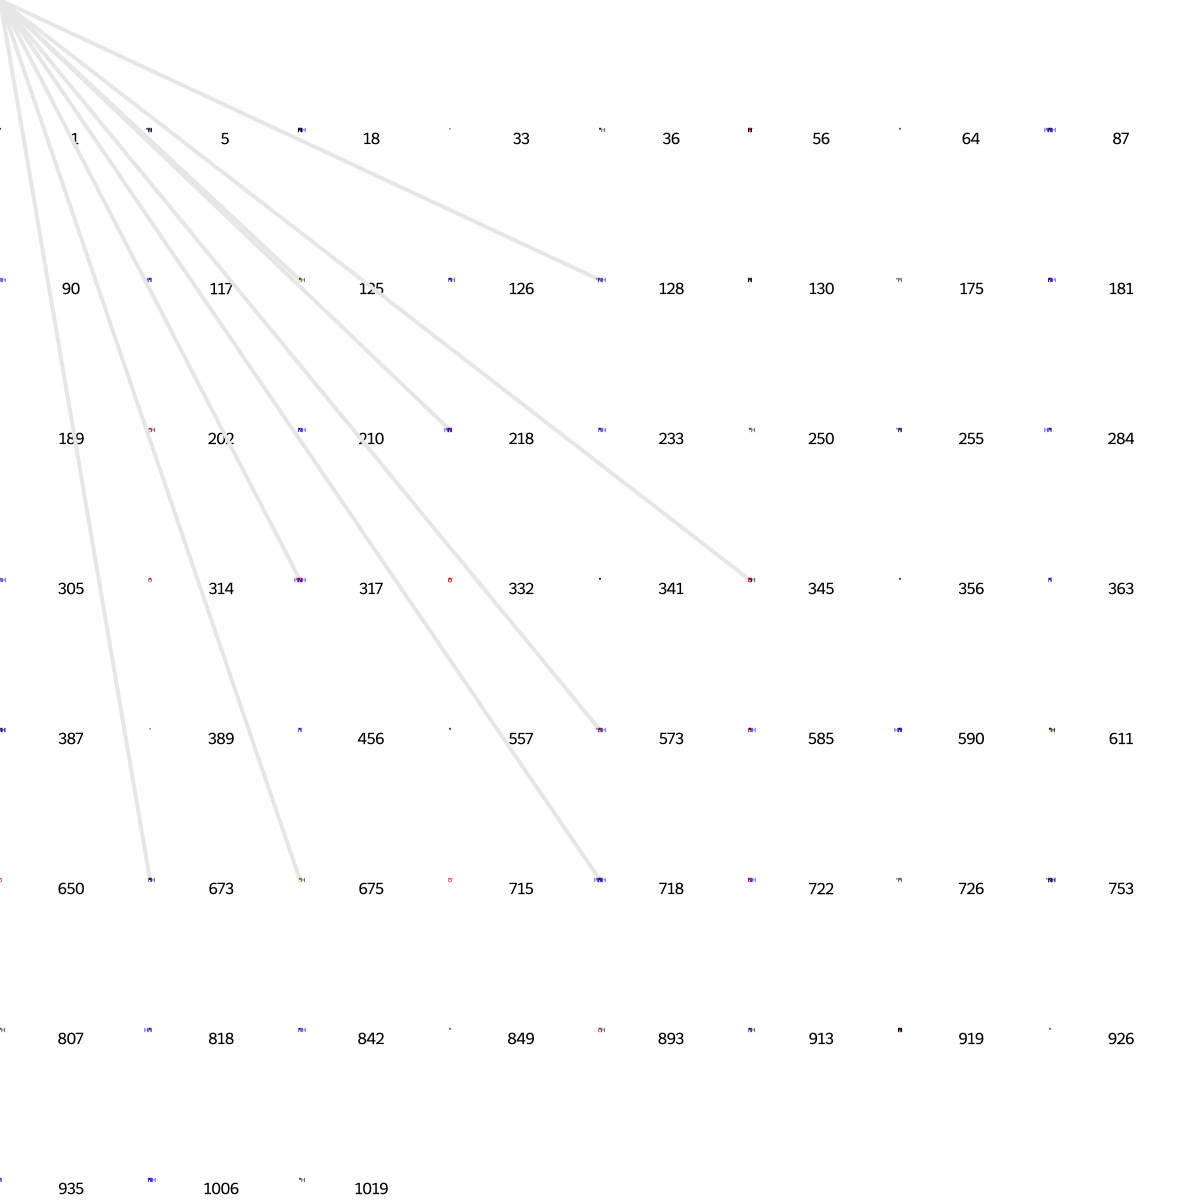

In [279]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [280]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[3,
 10,
 13,
 32,
 33,
 71,
 80,
 147,
 173,
 210,
 212,
 221,
 224,
 249,
 282,
 332,
 333,
 356,
 362,
 374,
 378,
 401,
 426,
 458,
 512,
 521,
 540,
 575,
 636,
 645,
 649,
 650,
 677,
 694,
 695,
 710,
 714,
 721,
 730,
 731,
 786,
 807,
 826,
 841,
 842,
 849,
 868,
 875,
 887,
 893,
 895,
 926,
 931,
 946,
 1019]

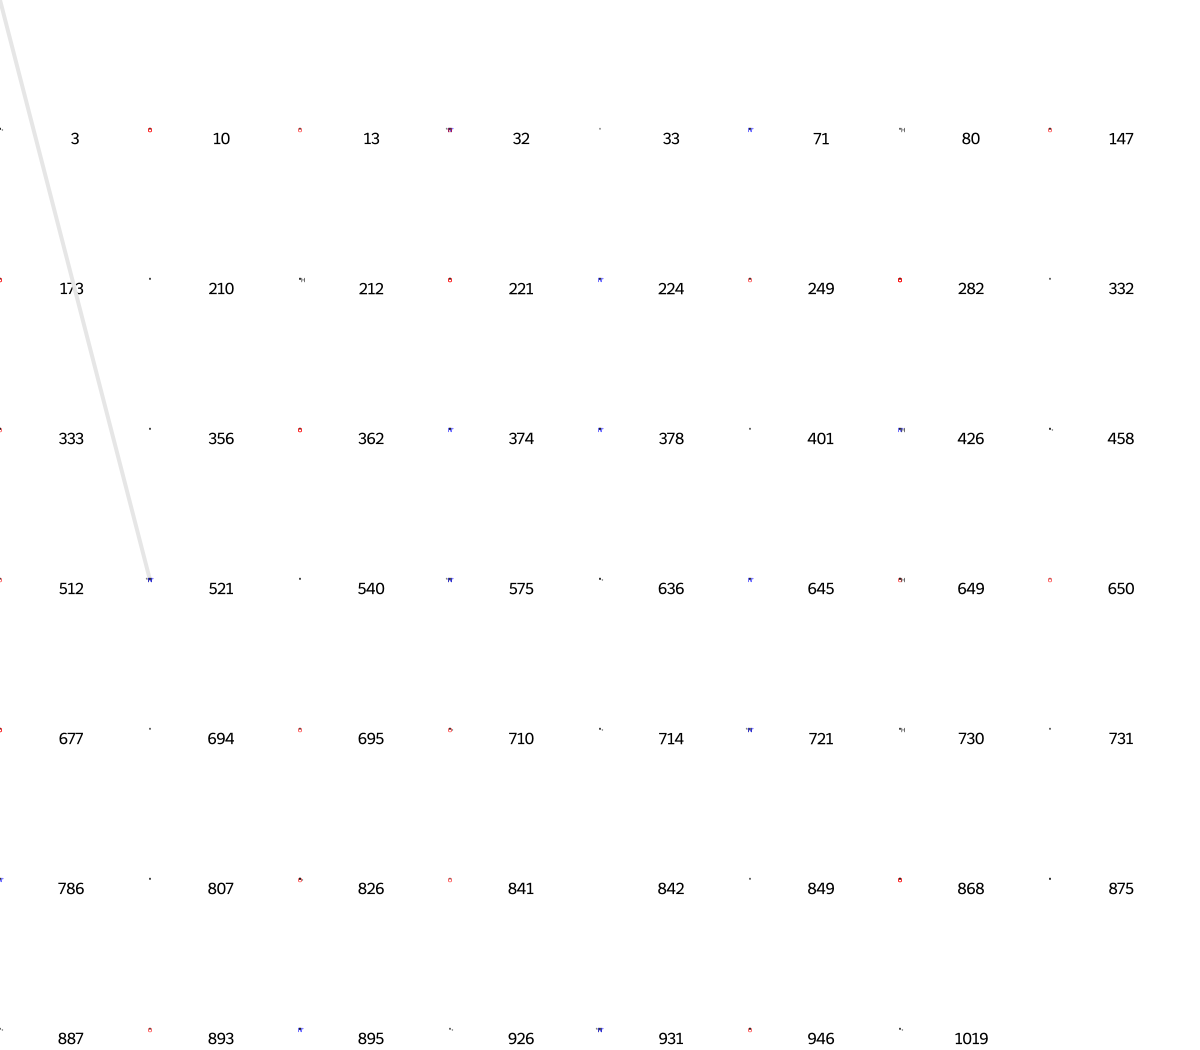

In [281]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [282]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[7,
 16,
 33,
 36,
 71,
 80,
 84,
 88,
 102,
 105,
 138,
 182,
 186,
 195,
 242,
 249,
 250,
 262,
 294,
 301,
 314,
 356,
 362,
 387,
 408,
 453,
 479,
 504,
 519,
 529,
 549,
 562,
 593,
 622,
 650,
 693,
 695,
 714,
 766,
 807,
 841,
 849,
 860,
 893,
 898,
 926,
 927,
 1019]

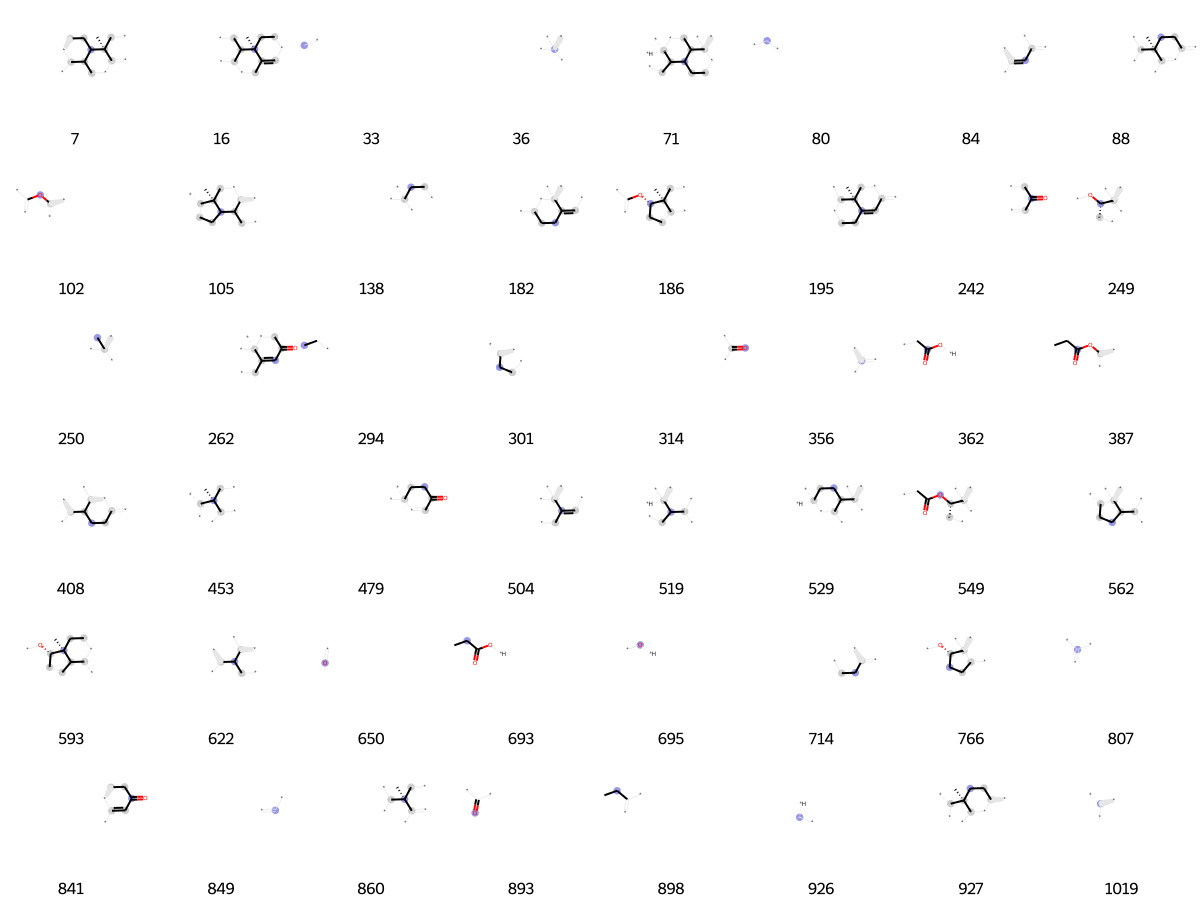

In [283]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [284]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[33,
 36,
 91,
 113,
 114,
 116,
 183,
 255,
 317,
 322,
 334,
 356,
 389,
 392,
 548,
 550,
 650,
 659,
 679,
 684,
 695,
 718,
 726,
 770,
 779,
 805,
 807,
 849,
 893,
 926,
 953,
 1019]

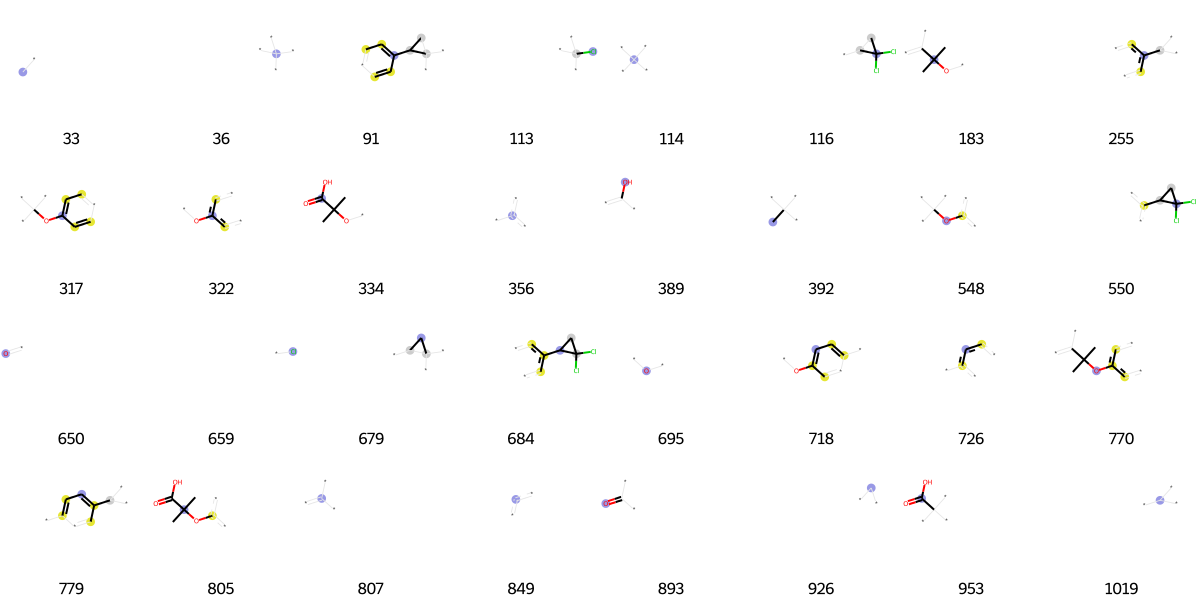

In [285]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [286]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 23,
 67,
 108,
 147,
 341,
 344,
 356,
 389,
 456,
 623,
 650,
 701,
 706,
 709,
 726,
 786,
 807,
 820,
 829,
 849,
 875,
 893,
 967,
 1022]

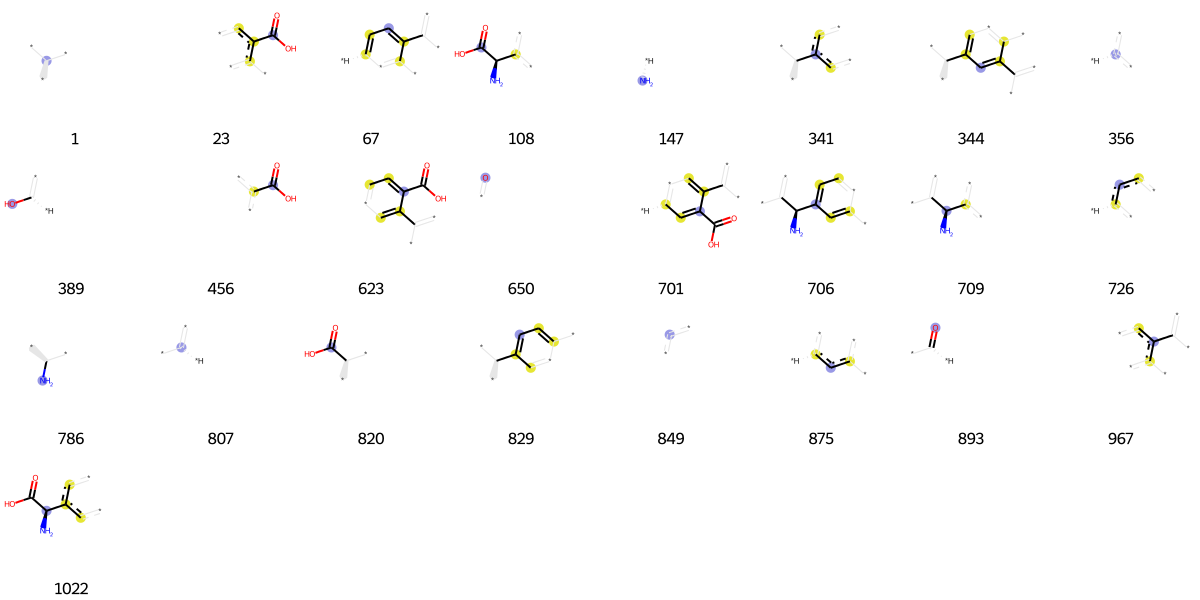

In [287]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [288]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1, 26, 114, 223, 317, 406, 429, 518, 655, 659, 695, 723, 725, 904, 914, 916]

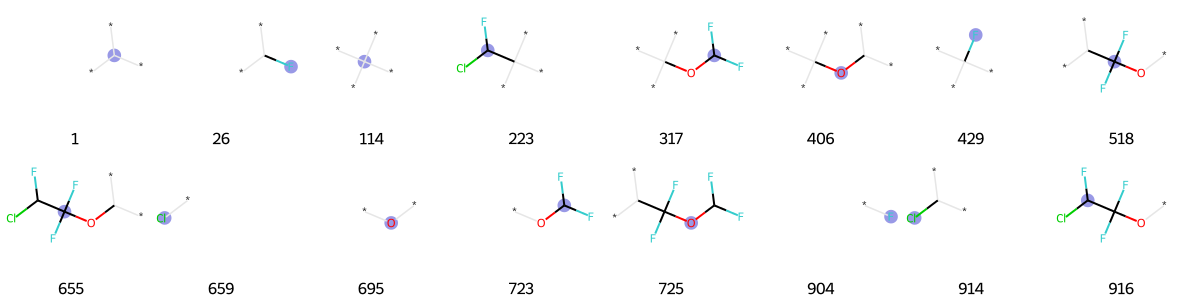

In [289]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [290]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[13,
 25,
 31,
 36,
 46,
 48,
 53,
 64,
 80,
 130,
 137,
 163,
 210,
 222,
 233,
 274,
 284,
 289,
 314,
 356,
 399,
 452,
 463,
 492,
 497,
 558,
 578,
 606,
 610,
 633,
 643,
 650,
 656,
 670,
 694,
 726,
 740,
 745,
 754,
 793,
 807,
 820,
 829,
 835,
 849,
 878,
 889,
 893,
 897,
 934,
 1003,
 1005,
 1007,
 1009,
 1019]

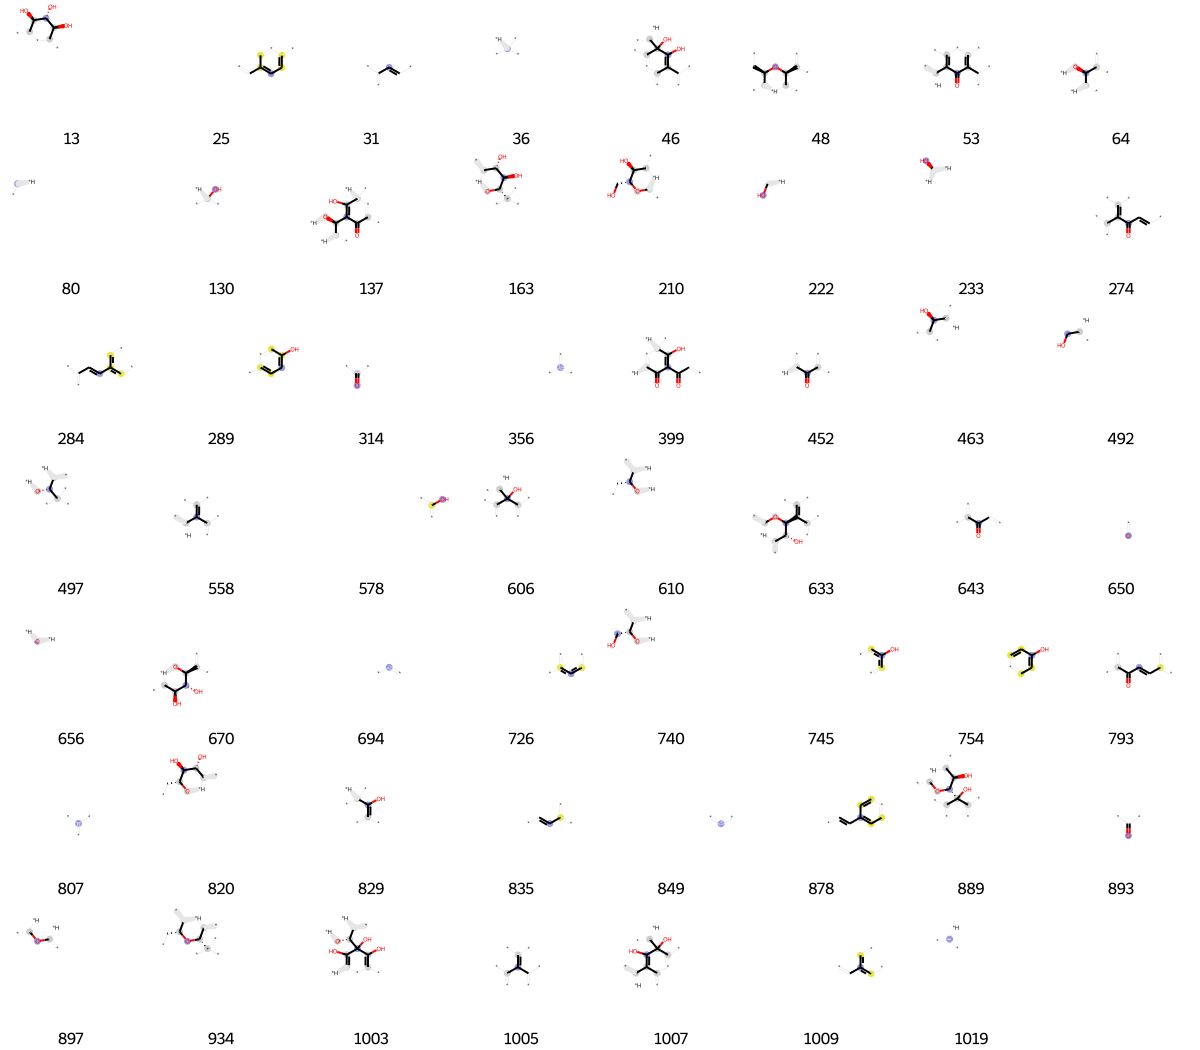

In [291]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [292]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[1,
 2,
 4,
 15,
 33,
 64,
 72,
 77,
 80,
 128,
 175,
 214,
 230,
 235,
 237,
 288,
 290,
 301,
 319,
 330,
 356,
 367,
 378,
 387,
 428,
 431,
 432,
 451,
 463,
 492,
 573,
 581,
 584,
 610,
 629,
 631,
 637,
 646,
 650,
 698,
 699,
 726,
 766,
 778,
 807,
 842,
 849,
 875,
 881,
 890,
 893,
 904,
 917,
 926,
 935,
 961,
 962,
 975,
 1011,
 1019]

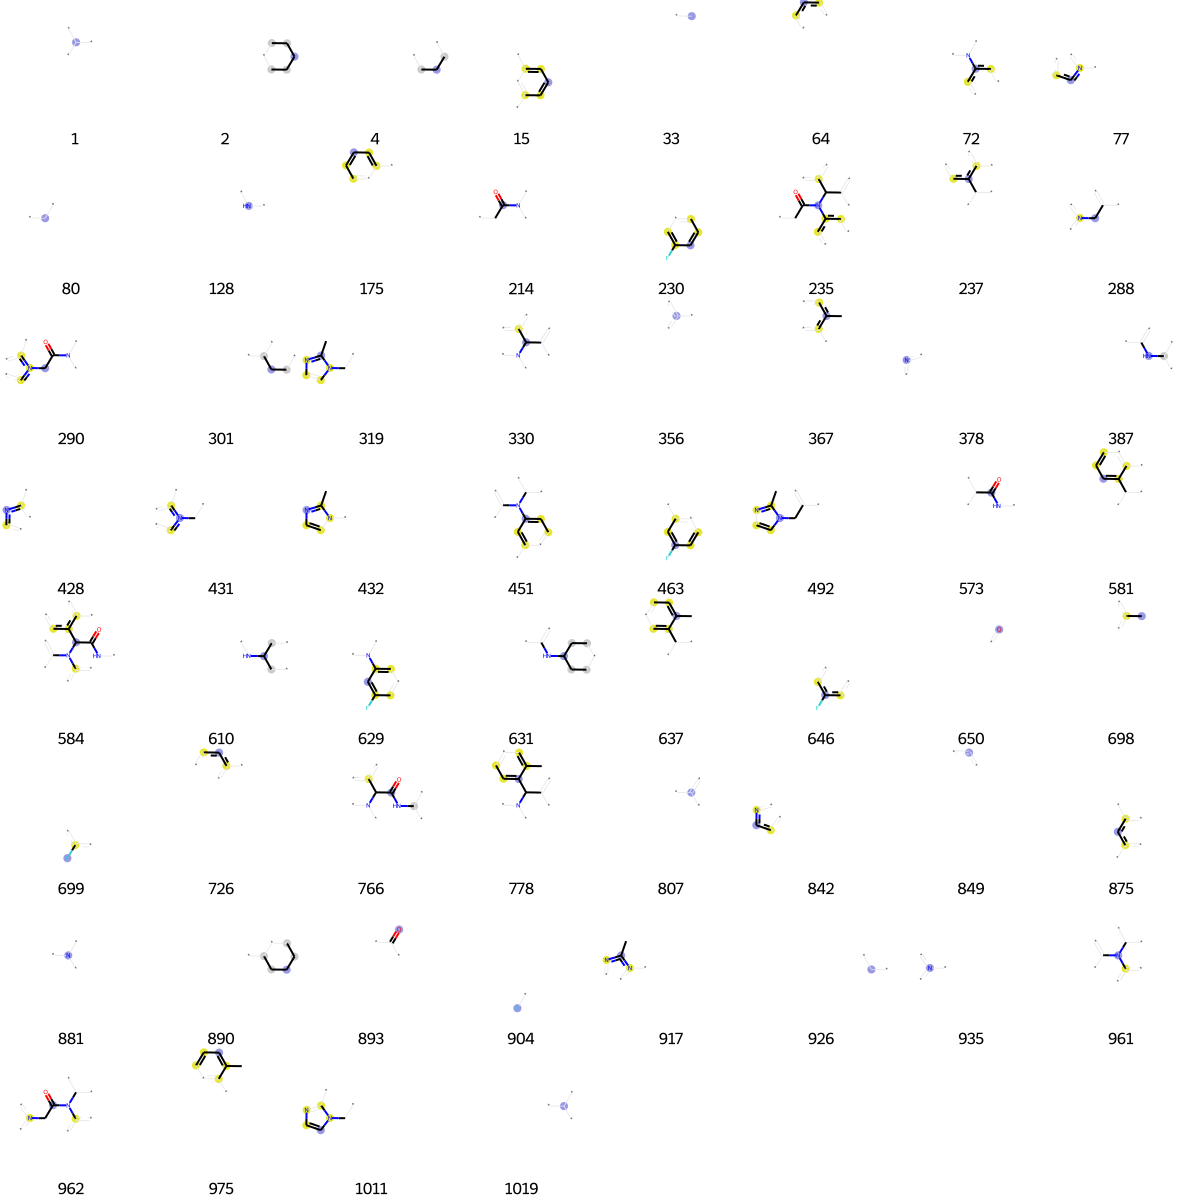

In [293]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [294]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 12,
 80,
 104,
 118,
 121,
 122,
 128,
 147,
 162,
 171,
 200,
 222,
 227,
 356,
 381,
 421,
 447,
 459,
 470,
 475,
 482,
 486,
 491,
 526,
 553,
 570,
 598,
 607,
 650,
 661,
 695,
 699,
 701,
 726,
 728,
 807,
 816,
 832,
 833,
 836,
 844,
 849,
 875,
 891,
 893,
 904,
 947,
 953,
 967,
 1014,
 1017]

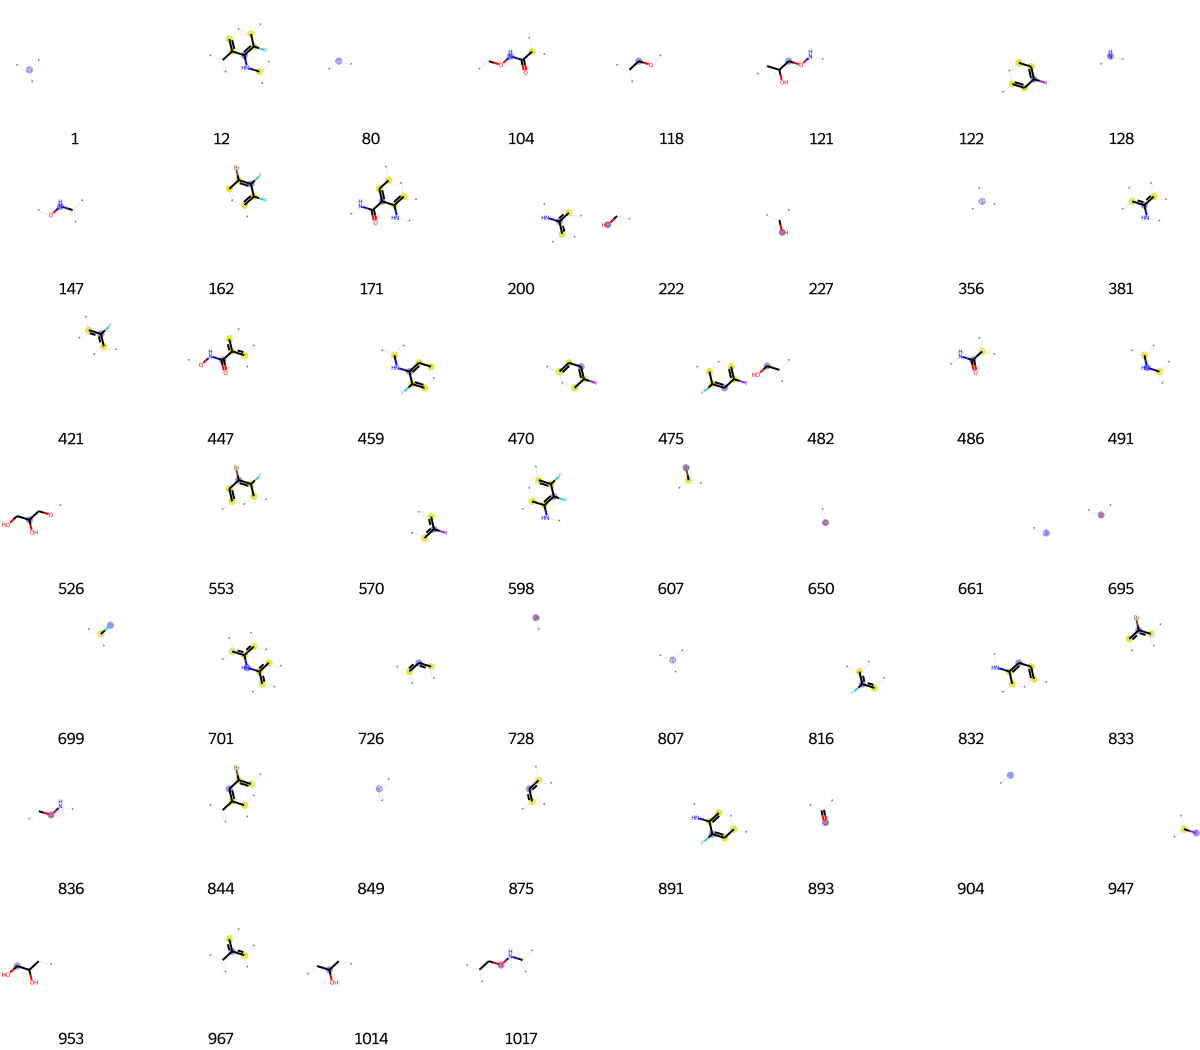

In [295]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [296]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[3,
 11,
 15,
 18,
 33,
 39,
 64,
 108,
 212,
 270,
 273,
 307,
 314,
 325,
 356,
 426,
 431,
 441,
 487,
 521,
 575,
 607,
 636,
 649,
 650,
 656,
 657,
 668,
 711,
 714,
 721,
 723,
 726,
 738,
 750,
 776,
 839,
 849,
 875,
 881,
 895,
 926,
 969,
 1004,
 1006,
 1019]

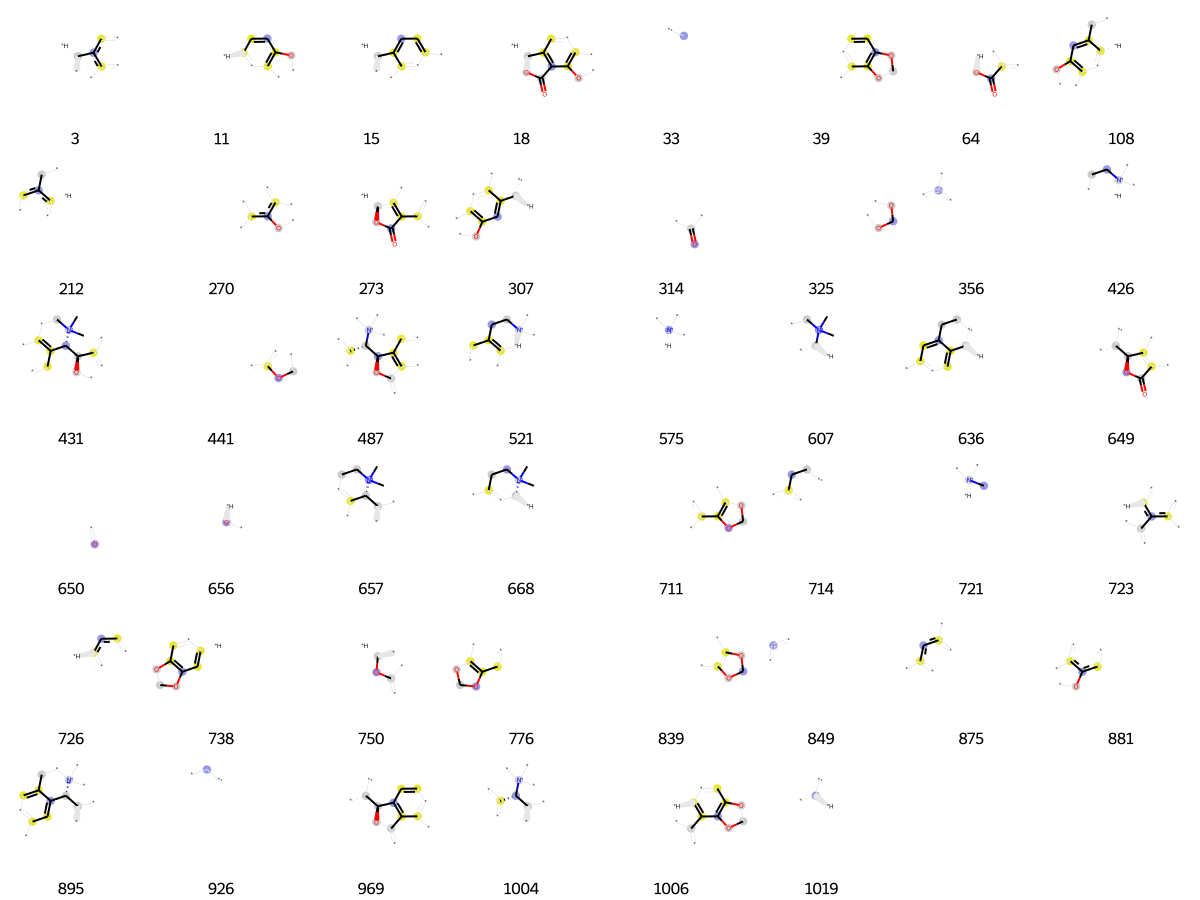

In [297]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [298]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 34,
 36,
 67,
 68,
 71,
 105,
 138,
 144,
 225,
 231,
 233,
 250,
 301,
 314,
 356,
 453,
 476,
 519,
 522,
 528,
 529,
 562,
 622,
 627,
 650,
 714,
 728,
 760,
 807,
 887,
 917,
 926,
 927,
 956,
 1019]

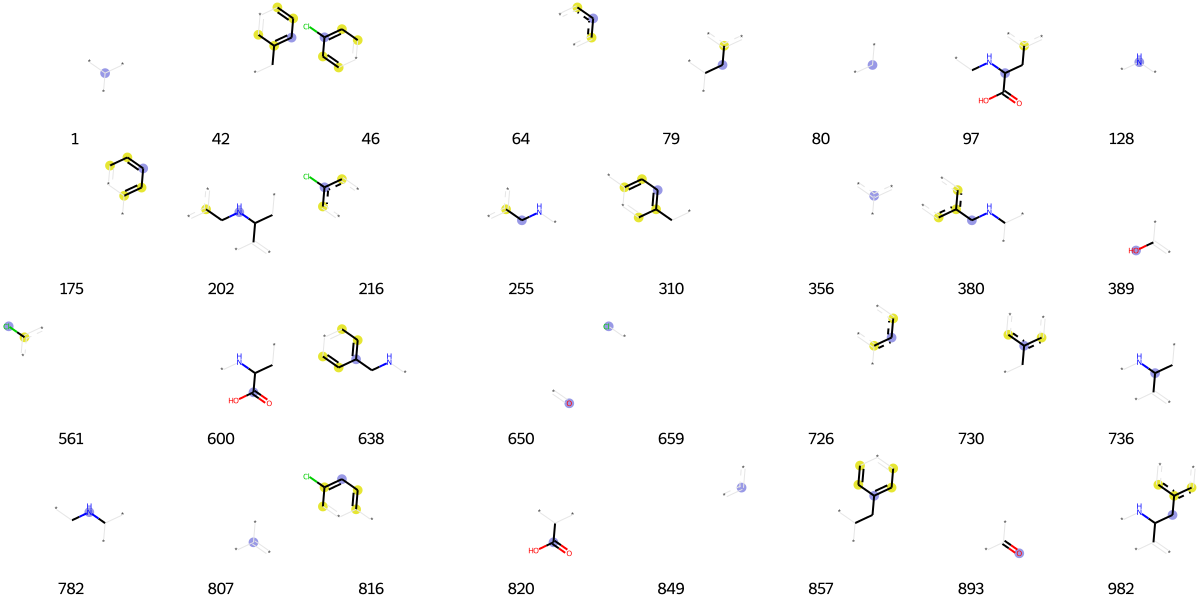

In [299]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [300]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[2,
 4,
 7,
 14,
 33,
 36,
 46,
 59,
 75,
 89,
 95,
 104,
 130,
 138,
 149,
 171,
 179,
 189,
 203,
 221,
 225,
 233,
 242,
 268,
 276,
 285,
 301,
 308,
 314,
 320,
 343,
 346,
 356,
 357,
 368,
 383,
 429,
 463,
 485,
 504,
 525,
 526,
 542,
 550,
 551,
 554,
 585,
 595,
 598,
 608,
 609,
 621,
 624,
 632,
 640,
 650,
 656,
 671,
 679,
 687,
 695,
 698,
 710,
 722,
 725,
 737,
 744,
 745,
 750,
 757,
 772,
 798,
 801,
 802,
 807,
 815,
 827,
 828,
 835,
 841,
 845,
 849,
 859,
 862,
 883,
 890,
 897,
 900,
 918,
 922,
 926,
 933,
 937,
 941,
 964,
 982,
 1019]

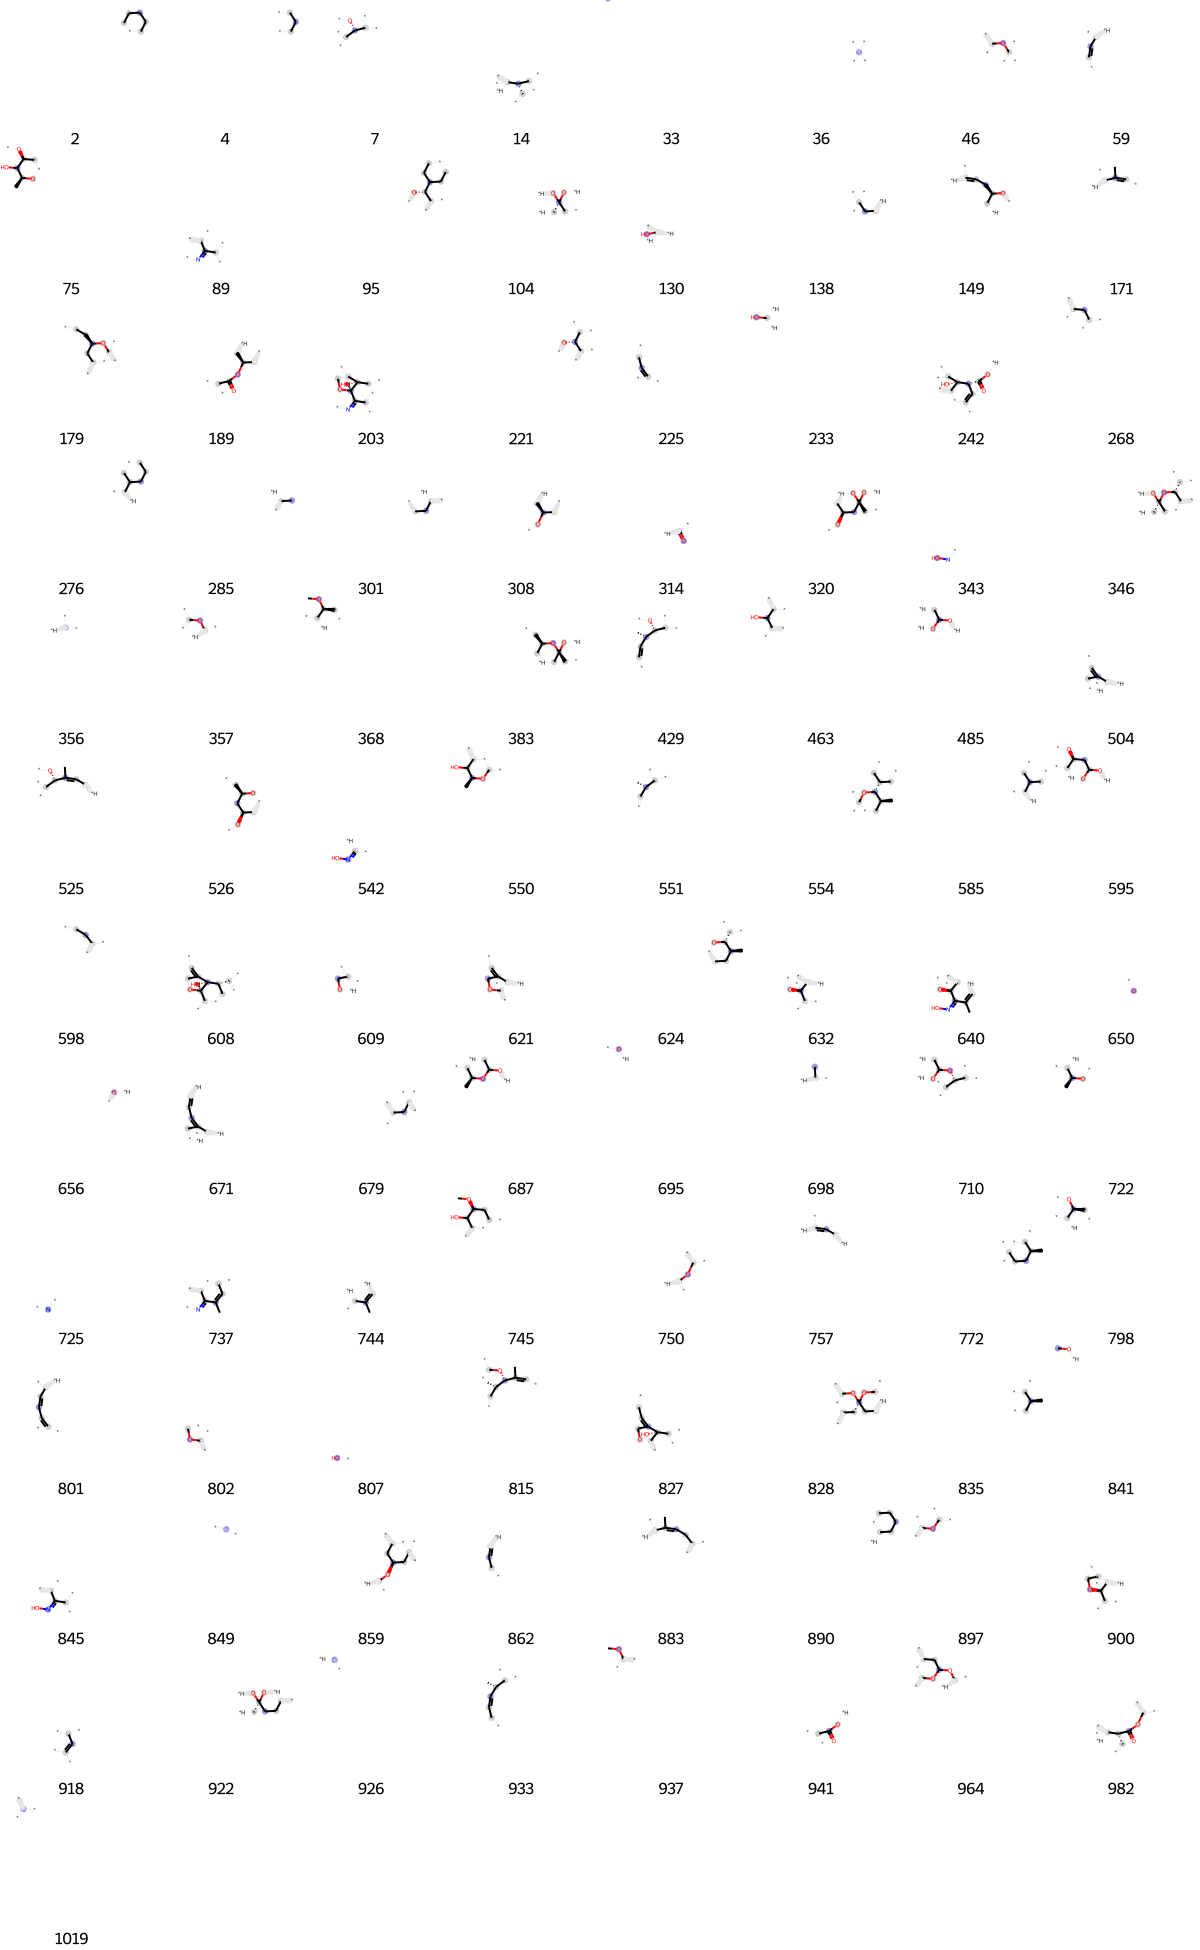

In [301]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [302]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[33,
 80,
 97,
 144,
 211,
 235,
 257,
 301,
 339,
 353,
 362,
 371,
 498,
 640,
 674,
 715,
 725,
 766,
 887,
 888,
 914,
 980]

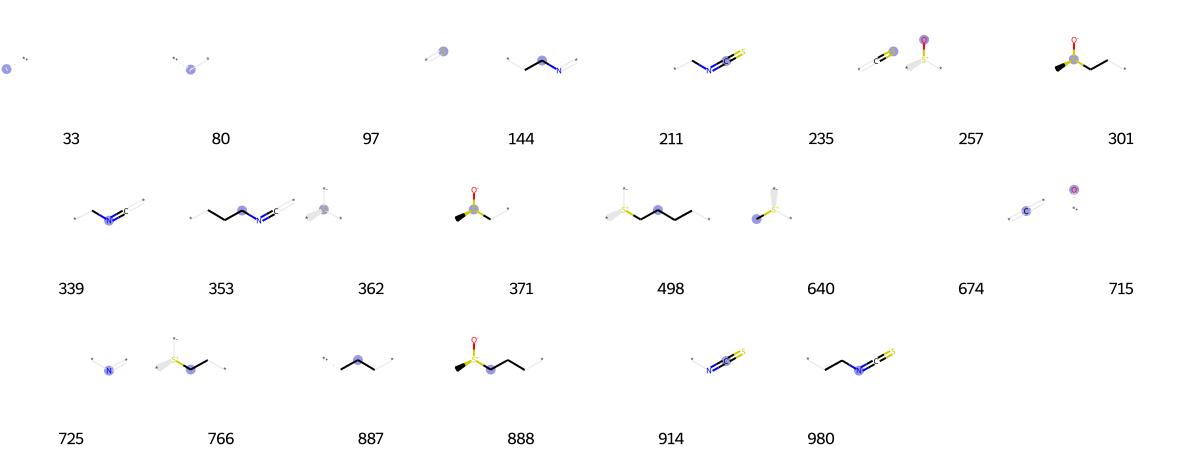

In [303]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [304]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[15,
 33,
 52,
 64,
 128,
 144,
 147,
 356,
 361,
 367,
 381,
 433,
 461,
 486,
 580,
 641,
 650,
 673,
 698,
 726,
 771,
 780,
 792,
 807,
 849,
 888,
 893,
 975]

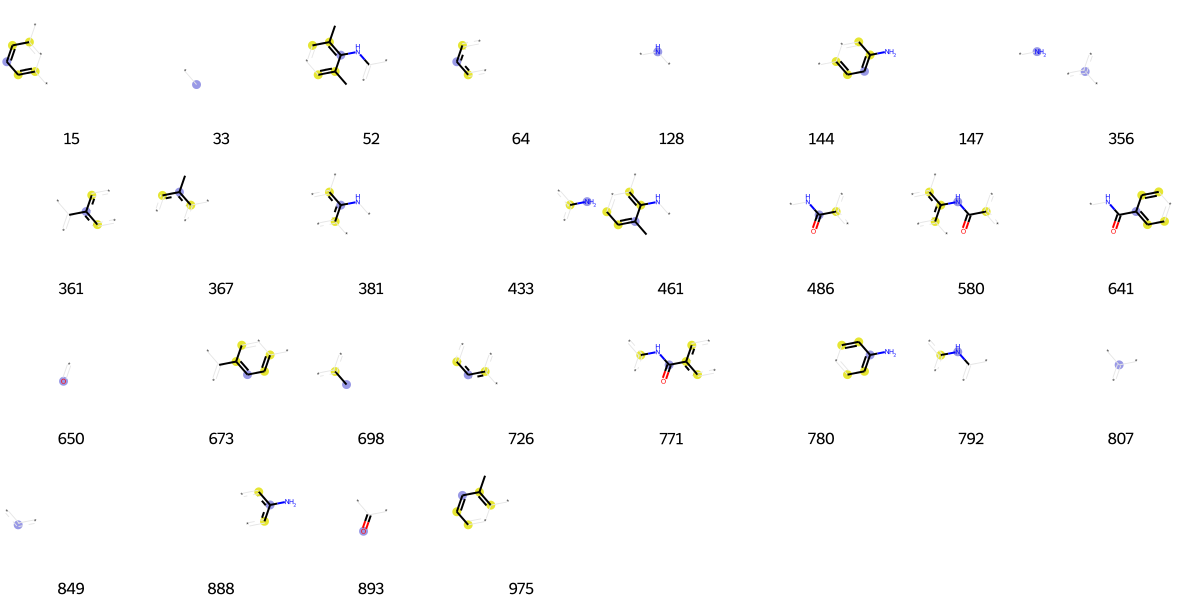

In [305]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [306]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[27,
 111,
 144,
 147,
 349,
 356,
 415,
 433,
 641,
 650,
 653,
 684,
 693,
 726,
 780,
 807,
 849,
 888]

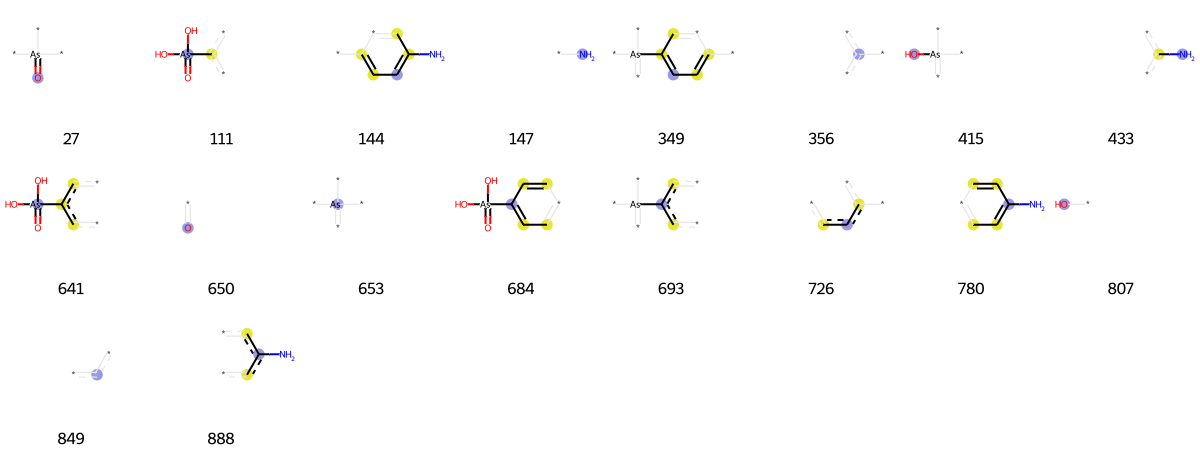

In [307]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [308]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[5,
 64,
 80,
 91,
 104,
 175,
 248,
 252,
 295,
 297,
 333,
 350,
 356,
 378,
 452,
 518,
 521,
 549,
 583,
 592,
 623,
 650,
 656,
 675,
 710,
 726,
 745,
 784,
 807,
 849,
 873]

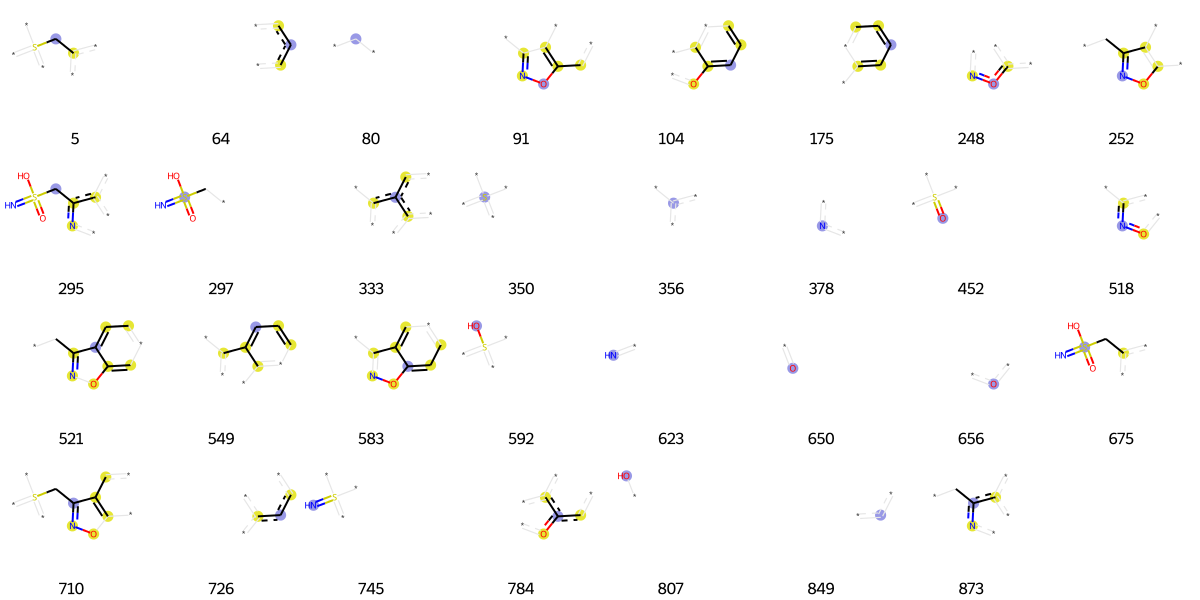

In [309]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [310]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[1,
 21,
 33,
 45,
 73,
 80,
 86,
 92,
 94,
 104,
 105,
 136,
 219,
 241,
 248,
 249,
 283,
 301,
 310,
 318,
 342,
 356,
 366,
 370,
 378,
 381,
 417,
 454,
 456,
 461,
 499,
 512,
 515,
 518,
 523,
 547,
 560,
 561,
 580,
 613,
 656,
 659,
 670,
 695,
 698,
 723,
 726,
 730,
 802,
 818,
 831,
 835,
 841,
 849,
 875,
 888,
 896,
 898,
 926,
 935,
 946,
 950,
 979,
 983,
 997]

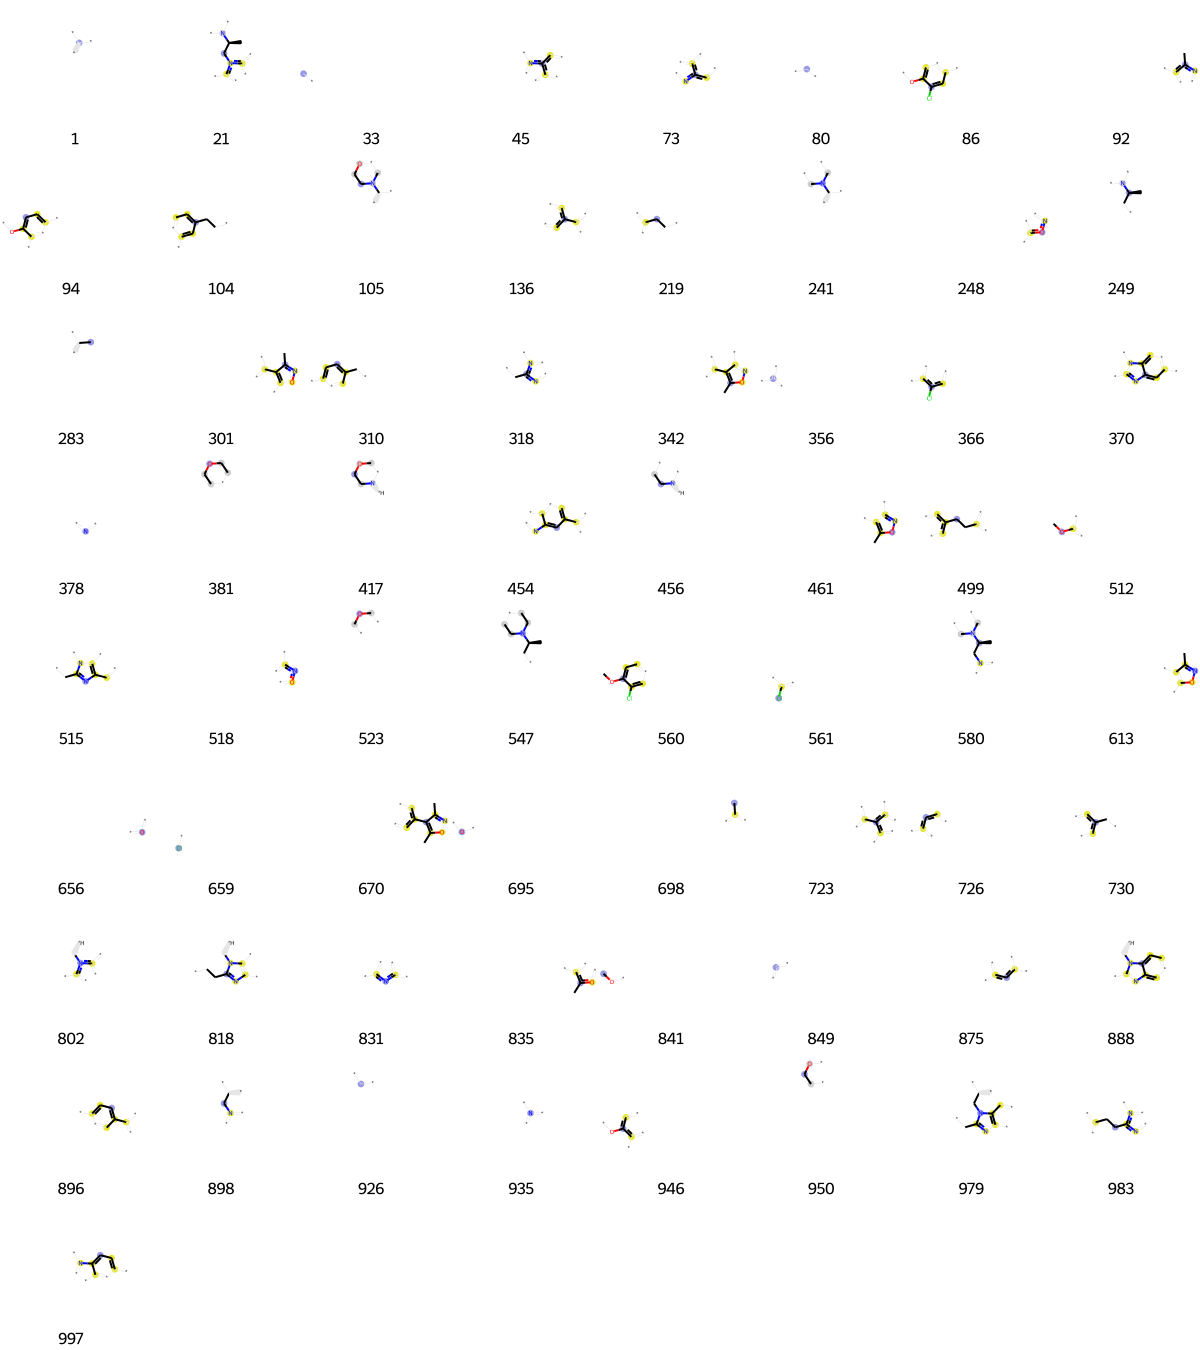

In [311]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [312]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[1,
 4,
 10,
 25,
 33,
 42,
 80,
 90,
 109,
 115,
 117,
 128,
 130,
 140,
 143,
 147,
 173,
 193,
 197,
 242,
 253,
 283,
 289,
 294,
 301,
 310,
 314,
 354,
 355,
 356,
 362,
 392,
 402,
 416,
 432,
 435,
 446,
 456,
 458,
 472,
 478,
 482,
 486,
 492,
 503,
 511,
 519,
 520,
 531,
 540,
 545,
 551,
 559,
 573,
 578,
 587,
 597,
 616,
 624,
 626,
 650,
 665,
 669,
 675,
 680,
 689,
 726,
 730,
 736,
 745,
 754,
 759,
 767,
 798,
 804,
 807,
 808,
 823,
 828,
 832,
 837,
 846,
 849,
 874,
 893,
 899,
 926,
 935,
 957,
 1004,
 1019]

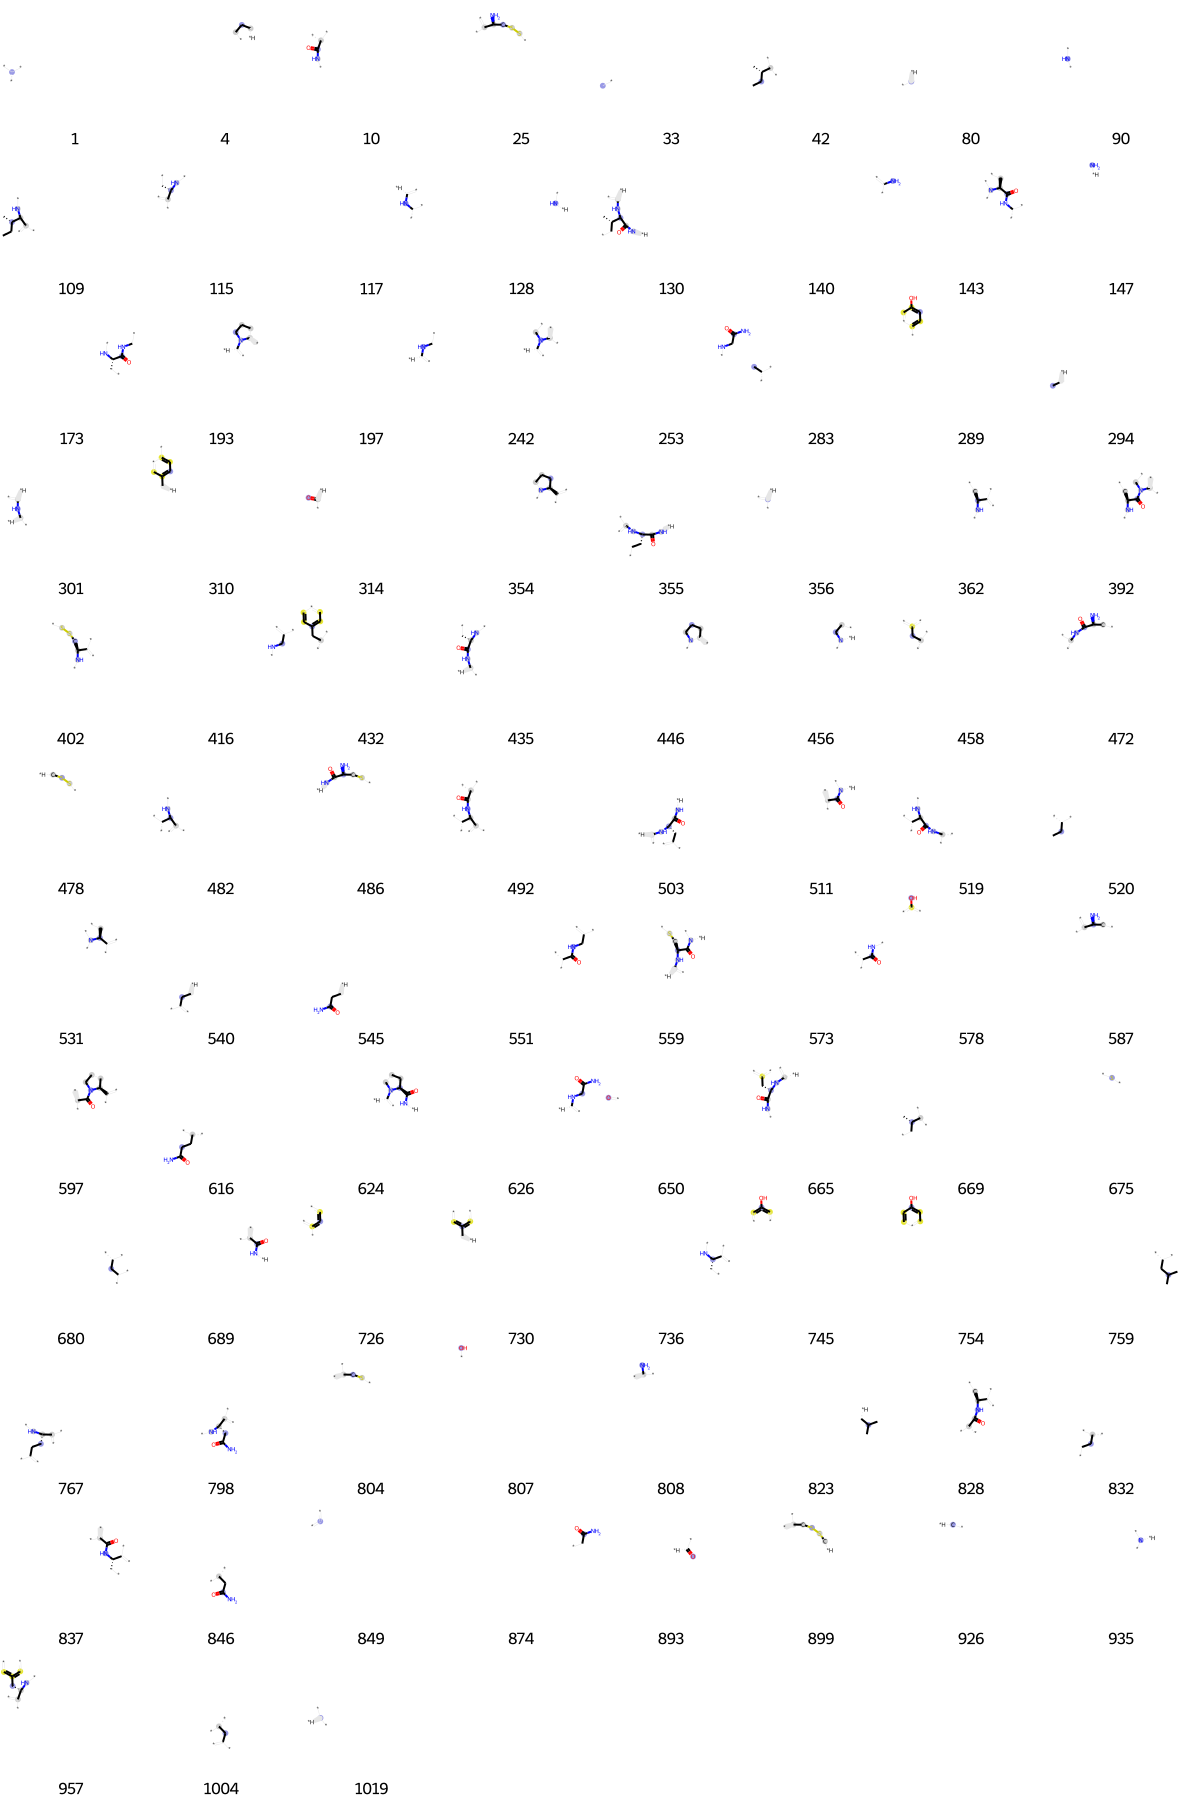

In [313]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [314]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[5,
 15,
 33,
 53,
 72,
 73,
 80,
 147,
 180,
 233,
 281,
 294,
 356,
 367,
 378,
 433,
 652,
 663,
 698,
 726,
 728,
 786,
 801,
 849,
 875,
 880,
 881,
 910,
 932,
 935,
 960,
 964,
 1018,
 1023]

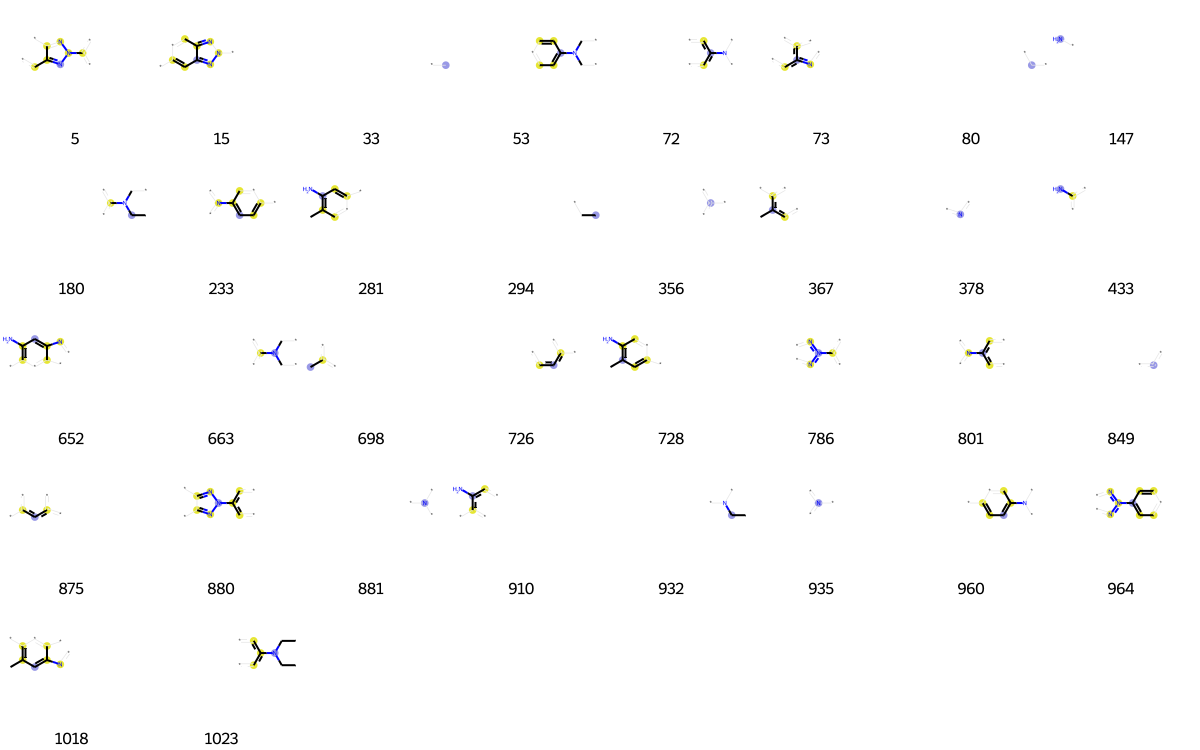

In [315]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [316]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[4,
 33,
 56,
 73,
 84,
 110,
 119,
 155,
 212,
 214,
 301,
 356,
 360,
 361,
 378,
 429,
 441,
 455,
 517,
 556,
 614,
 619,
 650,
 656,
 673,
 695,
 714,
 726,
 807,
 831,
 841,
 849,
 863,
 875,
 893,
 898,
 919,
 926,
 927,
 937,
 950,
 961,
 967,
 974,
 1000,
 1002,
 1019]

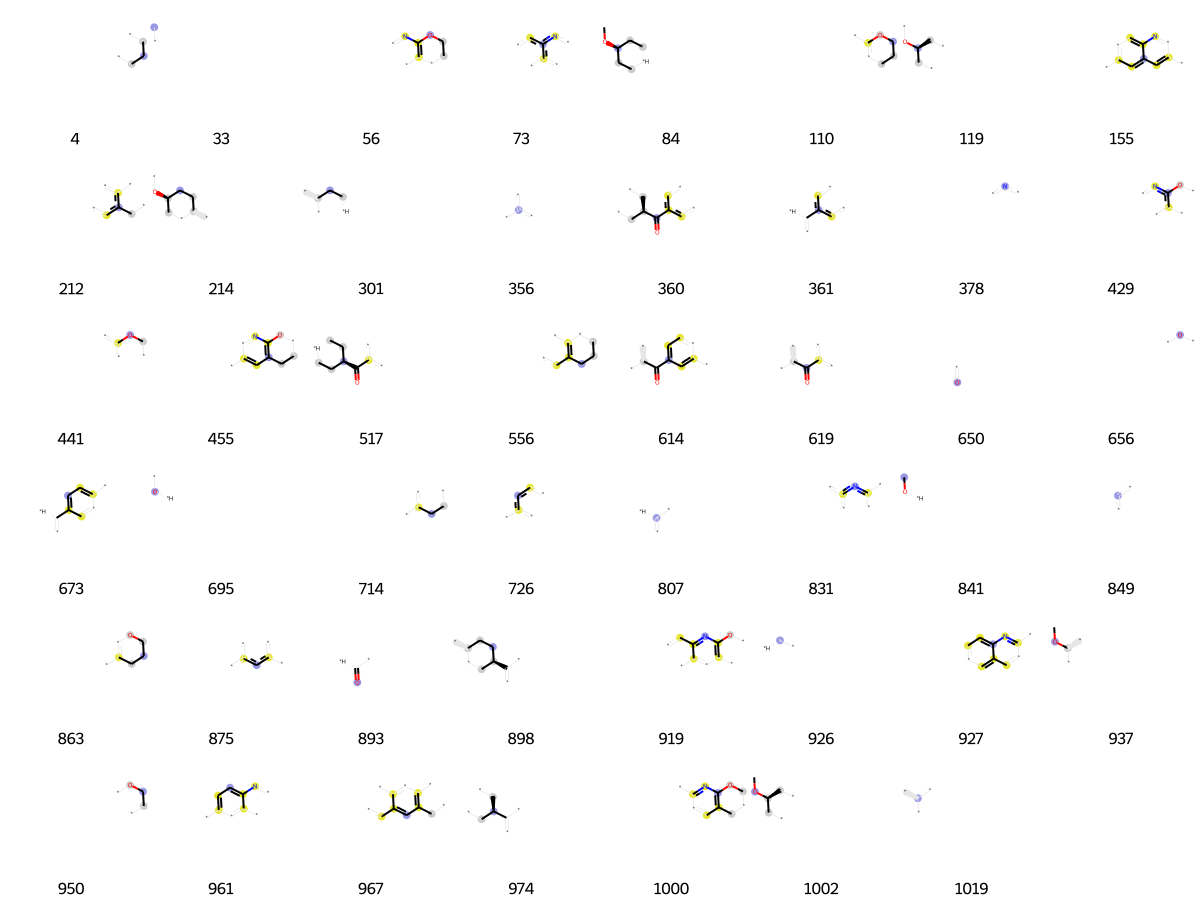

In [317]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [318]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[20,
 26,
 33,
 36,
 46,
 134,
 138,
 144,
 201,
 209,
 233,
 239,
 250,
 254,
 255,
 268,
 301,
 314,
 323,
 324,
 356,
 384,
 412,
 453,
 497,
 500,
 516,
 519,
 528,
 529,
 555,
 562,
 590,
 598,
 650,
 656,
 683,
 706,
 710,
 726,
 775,
 779,
 803,
 807,
 849,
 878,
 926,
 927,
 935,
 956,
 1019]

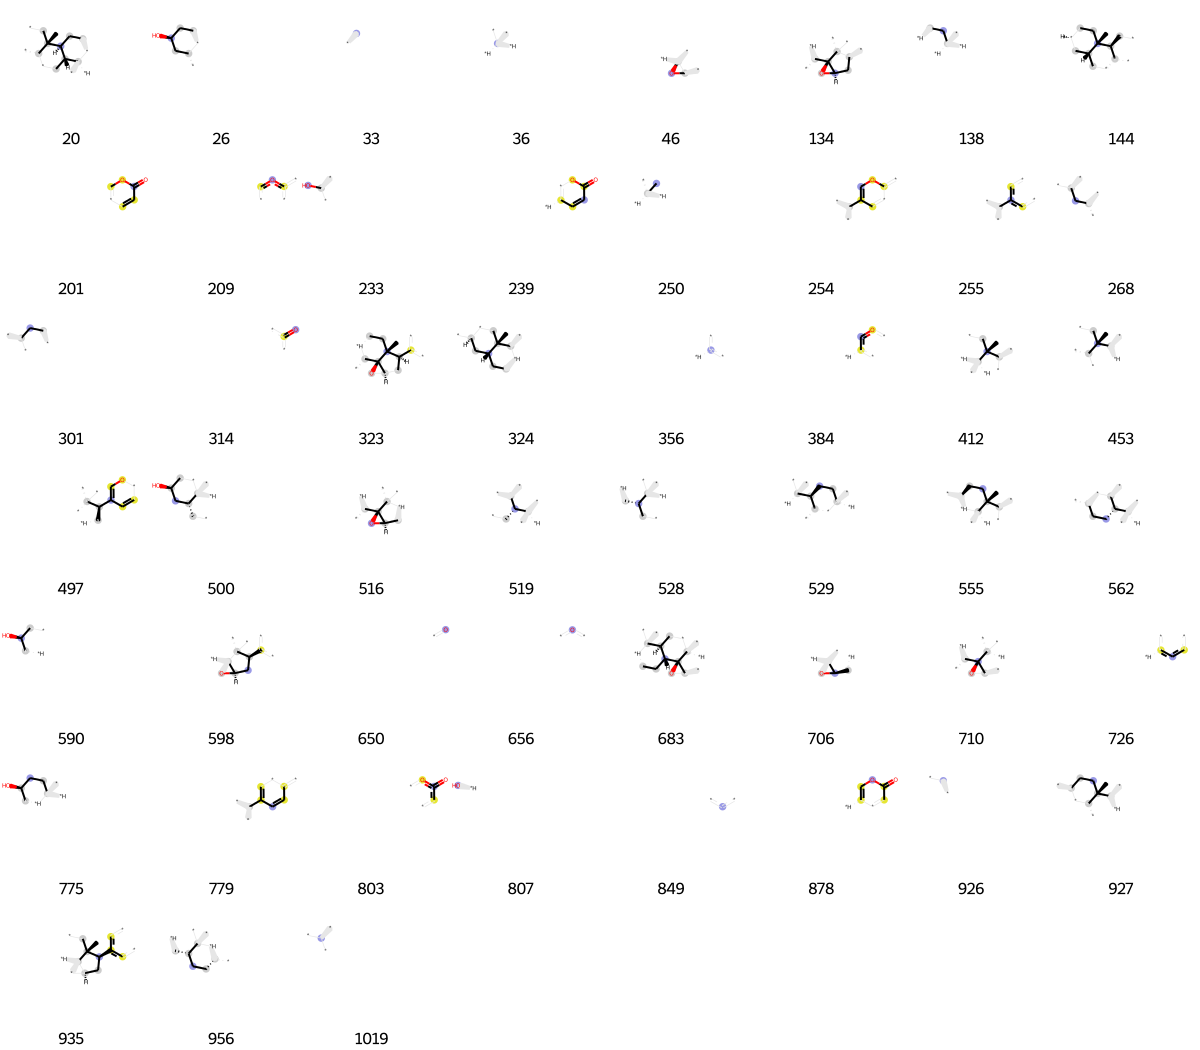

In [319]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [320]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[13,
 33,
 80,
 144,
 145,
 147,
 294,
 356,
 361,
 433,
 498,
 568,
 591,
 606,
 650,
 673,
 695,
 710,
 718,
 726,
 780,
 794,
 807,
 849,
 887,
 888,
 893]

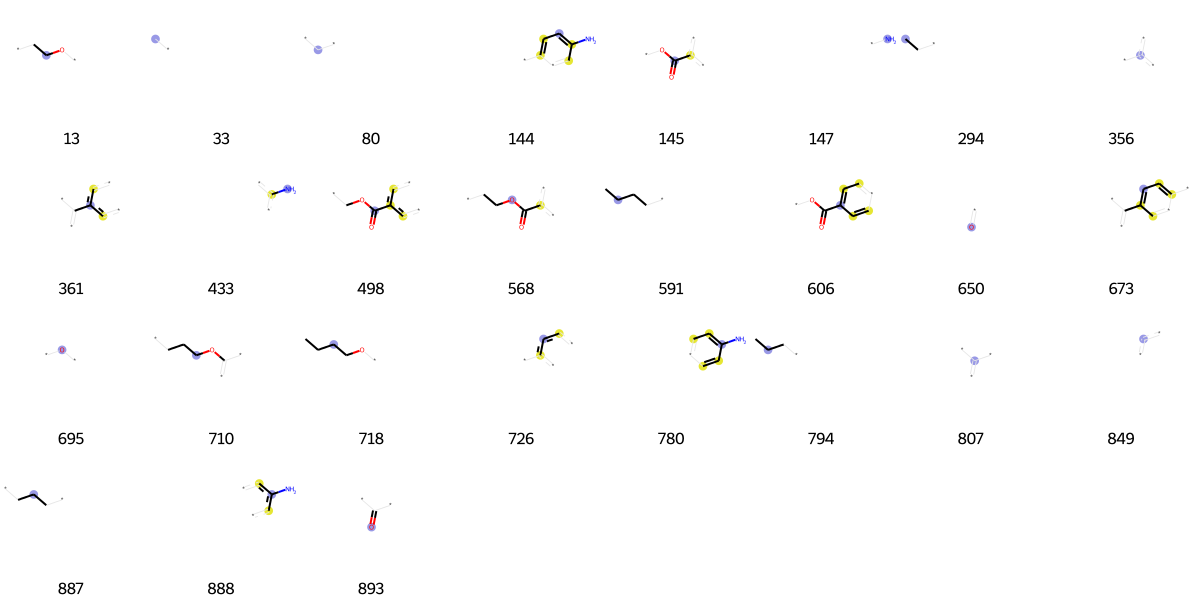

In [321]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])